# **Assigment 2: Supervised Learning**

# NASA: Asteroids Classification


## Introduction

Asteroids, rocky bodies that orbit the Sun, have been a subject of fascination and concern for humanity for centuries. While most asteroids orbit harmlessly in space, a subset known as Near Earth Objects (NEOs) have trajectories that bring them close to Earth. Understanding the characteristics of these NEOs and assessing their potential impact on Earth is crucial for planetary defense and space exploration.

In this notebook, we explore an extensive dataset containing information about asteroids, including their trajectories, sizes, and closest approach dates to Earth. Our goal is to utilize machine learning techniques to predict the hazardous nature of asteroids based solely on their characteristics.

<center><img src = 'images/orbits-of-potentially-hazardous-asteroids.jpg'></center>
<center>Plot of orbits of known potentially hazardous asteroids</center>

### The Dataset

The dataset utilized in this analysis is sourced from the Near Earth Object Web Service (NeoWs), a RESTful API provided by NASA.  
API URL: http://neo.jpl.nasa.gov/  
Maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English, Peter Baunach.  

#### Import

To begin with, there are some essential libraries required for this assignment. These libraries are fundamental for data manipulation, analysis, and visualization:

- pandas: For handling data structures and operations
- seaborn: for creating informative and attractive statistical graphics
- matplotlib.pyplot: For foundational plotting capabilities
- numpy: For numerical computations and array operations
- sklearn: For machine learning algorithms

In [37]:
%pip install imbalanced-learn

#DataSet
import warnings
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve, LearningCurveDisplay, ShuffleSplit
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import time

warnings.filterwarnings('ignore')

#### DataFrame

Reading the data from a csv file into a pandas DataFrame and checking the data.

In [38]:
nasa_data = pd.read_csv("dataset/nasa.csv")
nasa_data.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   

   Hazardous  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 40 columns]

In [39]:
nasa_data.shape

(4687, 40)

## Data Preprocessing


### Missing Values

Detecting any missing data.

In [40]:
nasa_data.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

There were no missing data in the columns.

#### Examining the Data Provided

The dataset contains the following information on 4687 Near-Earth Objects (NEOs):

In [41]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Let's start by printing out some summary statistics about the dataset.

In [42]:
nasa_data.describe()

Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402         826.391249   
min              0.002260           1.010543           2.259644   
25%              0.074824          33.462237          74.823838   
50%              0.247765         110.803882         247.765013   
75%              0.567597         253.837029         567.596853   
max             34.836938       15579.552413       34836.938254   

       Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
count            4687.000000            4687.000000           4687.000000   
mean                0.127135               0.284283            671.273653   
std                 0.229642               0.513496           1212.511199   
min                 0.000628               0.001404              3.315431   
25%                 0.020792               0.046493            109.784247   
50%                 0.068850               0.153954            363.529809   
75%                 0.157727               0.352688            832.798679   
max                 9.680682              21.646663          51114.018738   

       ...  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
count  ...      4687.000000  4687.000000         4687.000000     4687.000000   
mean   ...         1.400264    13.373844          172.157275      635.582076   
std    ...         0.524154    10.936227          103.276777      370.954727   
min    ...         0.615920     0.014513            0.001941      176.557161   
25%    ...         1.000635     4.962341           83.081208      365.605031   
50%    ...         1.240981    10.311836          172.625393      504.947292   
75%    ...         1.678364    19.511681          255.026909      794.195972   
max    ...         5.072008    75.406667          359.905890     4172.231343   

       Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  \
count          4687.000000     4687.000000    4687.000000     4.687000e+03   
mean              0.813383      183.932151       1.987144     2.457728e+06   
std               0.242059      103.513035       0.951519     9.442264e+02   
min               0.080744        0.006918       0.803765     2.450100e+06   
25%               0.630834       95.625916       1.266059     2.457815e+06   
50%               0.833153      189.761641       1.618195     2.457973e+06   
75%               0.997227      271.777557       2.451171     2.458108e+06   
max               1.299832      359.993098       8.983852     2.458839e+06   

       Mean Anomaly  Mean Motion  
count   4687.000000  4687.000000  
mean     181.167927     0.738242  
std      107.501623     0.342627  
min        0.003191     0.086285  
25%       87.006918     0.453289  
50%      185.718889     0.712946  
75%      276.531946     0.984669  
max      359.917991     2.039000  

[8 rows x 35 columns]

### Data Filtering

There's quite a bit of clutter in this dataset, so our initial step is to sift through and eliminate irrelevant information. Our aim is to concentrate solely on attributes crucial for determining whether an asteroid poses a hazard.

#### Duplicated Data:

As we sift through the dataset, we notice instances where the same information is presented in different columns, with diferent units of measurement. This redundancy can be seen in various attributes, potentially leading to confusion in our analysis.

To confirm this redundancy, we can generate a heatmap of the correlation that provides a visual representation of the relationships between attributes in a dataset. 

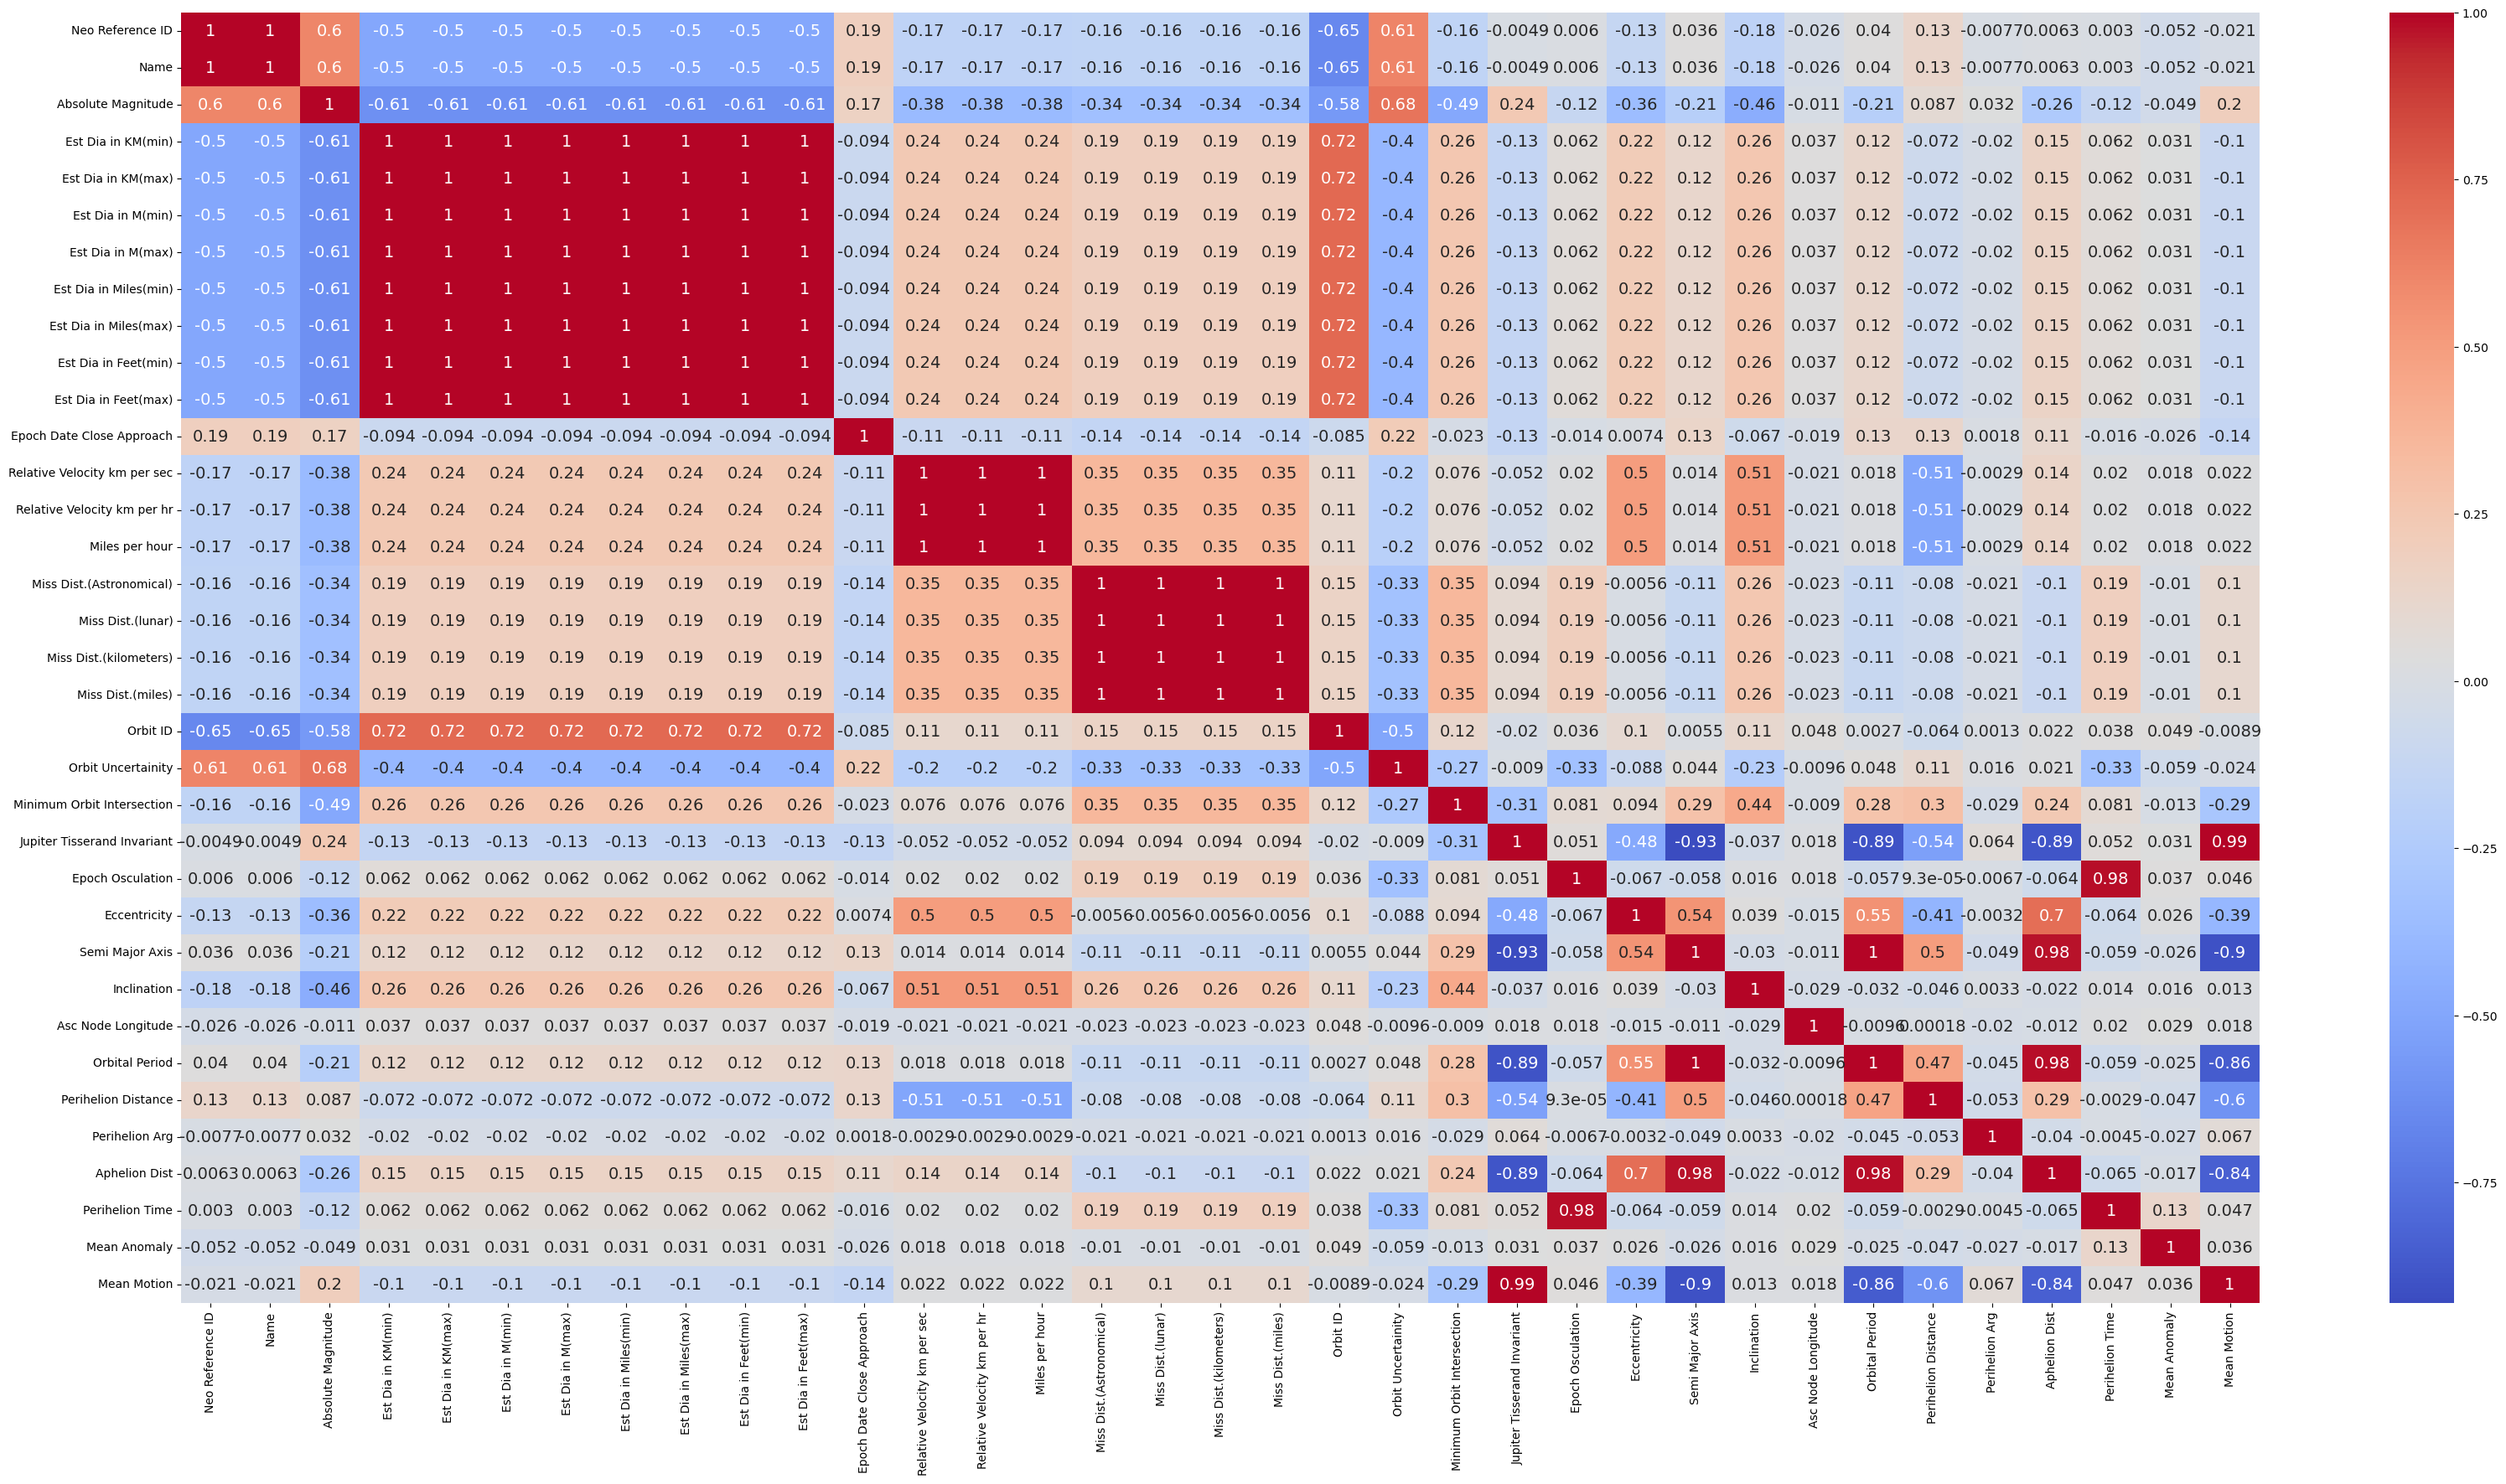

In [43]:
correlation = nasa_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(40, 20))
sb.heatmap(correlation, annot=True, cmap="coolwarm", annot_kws={"size": 14})
plt.show()

As we can see from the heatmap, there is a correlation of 1 among the columns with different units of measurement. This indicates that the columns contain identical information but are expressed in different units. Therefore, we can confidently conclude that these columns are redundant. Consequently, we can proceed to drop the redundant columns.

The identical columns detected in the following characteristics are:
- Estimated Diameter (max and min)
- Miss Distance
- Relative Velocity

In [44]:
nasa_data = nasa_data.drop(columns=["Est Dia in M(min)", "Est Dia in M(max)", "Est Dia in Miles(min)", "Est Dia in Miles(max)", "Est Dia in Feet(min)", "Est Dia in Feet(max)"])
nasa_data = nasa_data.drop(columns=["Miss Dist.(Astronomical)", "Miss Dist.(lunar)", "Miss Dist.(miles)"])
nasa_data = nasa_data.drop(columns=["Relative Velocity km per sec", "Miles per hour"])

#### Informative data:

Another set of data that can be filtered out is informative data. Attributes such as asteroid names and discovery dates offer valuable context but do not play a direct role in predicting asteroid hazardness.

Therefore the following columns can be removed:
- Neo Reference ID
- Name
- Close Approach Date
- Epoch Date Close Approach
- Orbit Determination Date
- Orbit ID

In [45]:
nasa_data = nasa_data.drop(columns=["Neo Reference ID", "Name", "Close Approach Date", "Epoch Date Close Approach", "Orbit Determination Date", "Orbit ID"])

#### Unique Values:

Lastly, it can be easily noticed that some columns may have one unique value, across all rows, rendering the column irrelevant.

These columns are:
- Orbiting Body (may always has the value "Earth")
- Equinox (always has the value "J2000")

So we can check and then drop the columns, if it is true

In [46]:
nasa_data['Orbiting Body'].value_counts()

Orbiting Body
Earth    4687
Name: count, dtype: int64

In [47]:
nasa_data['Equinox'].value_counts()

Equinox
J2000    4687
Name: count, dtype: int64

In [48]:
nasa_data = nasa_data.drop(columns=["Orbiting Body", "Equinox"])

#### Data Correlation

Correlation analysis helps identify relationships between variables, revealing which attributes are strongly correlated with each other. Let's now examine the correlation among the attributes.

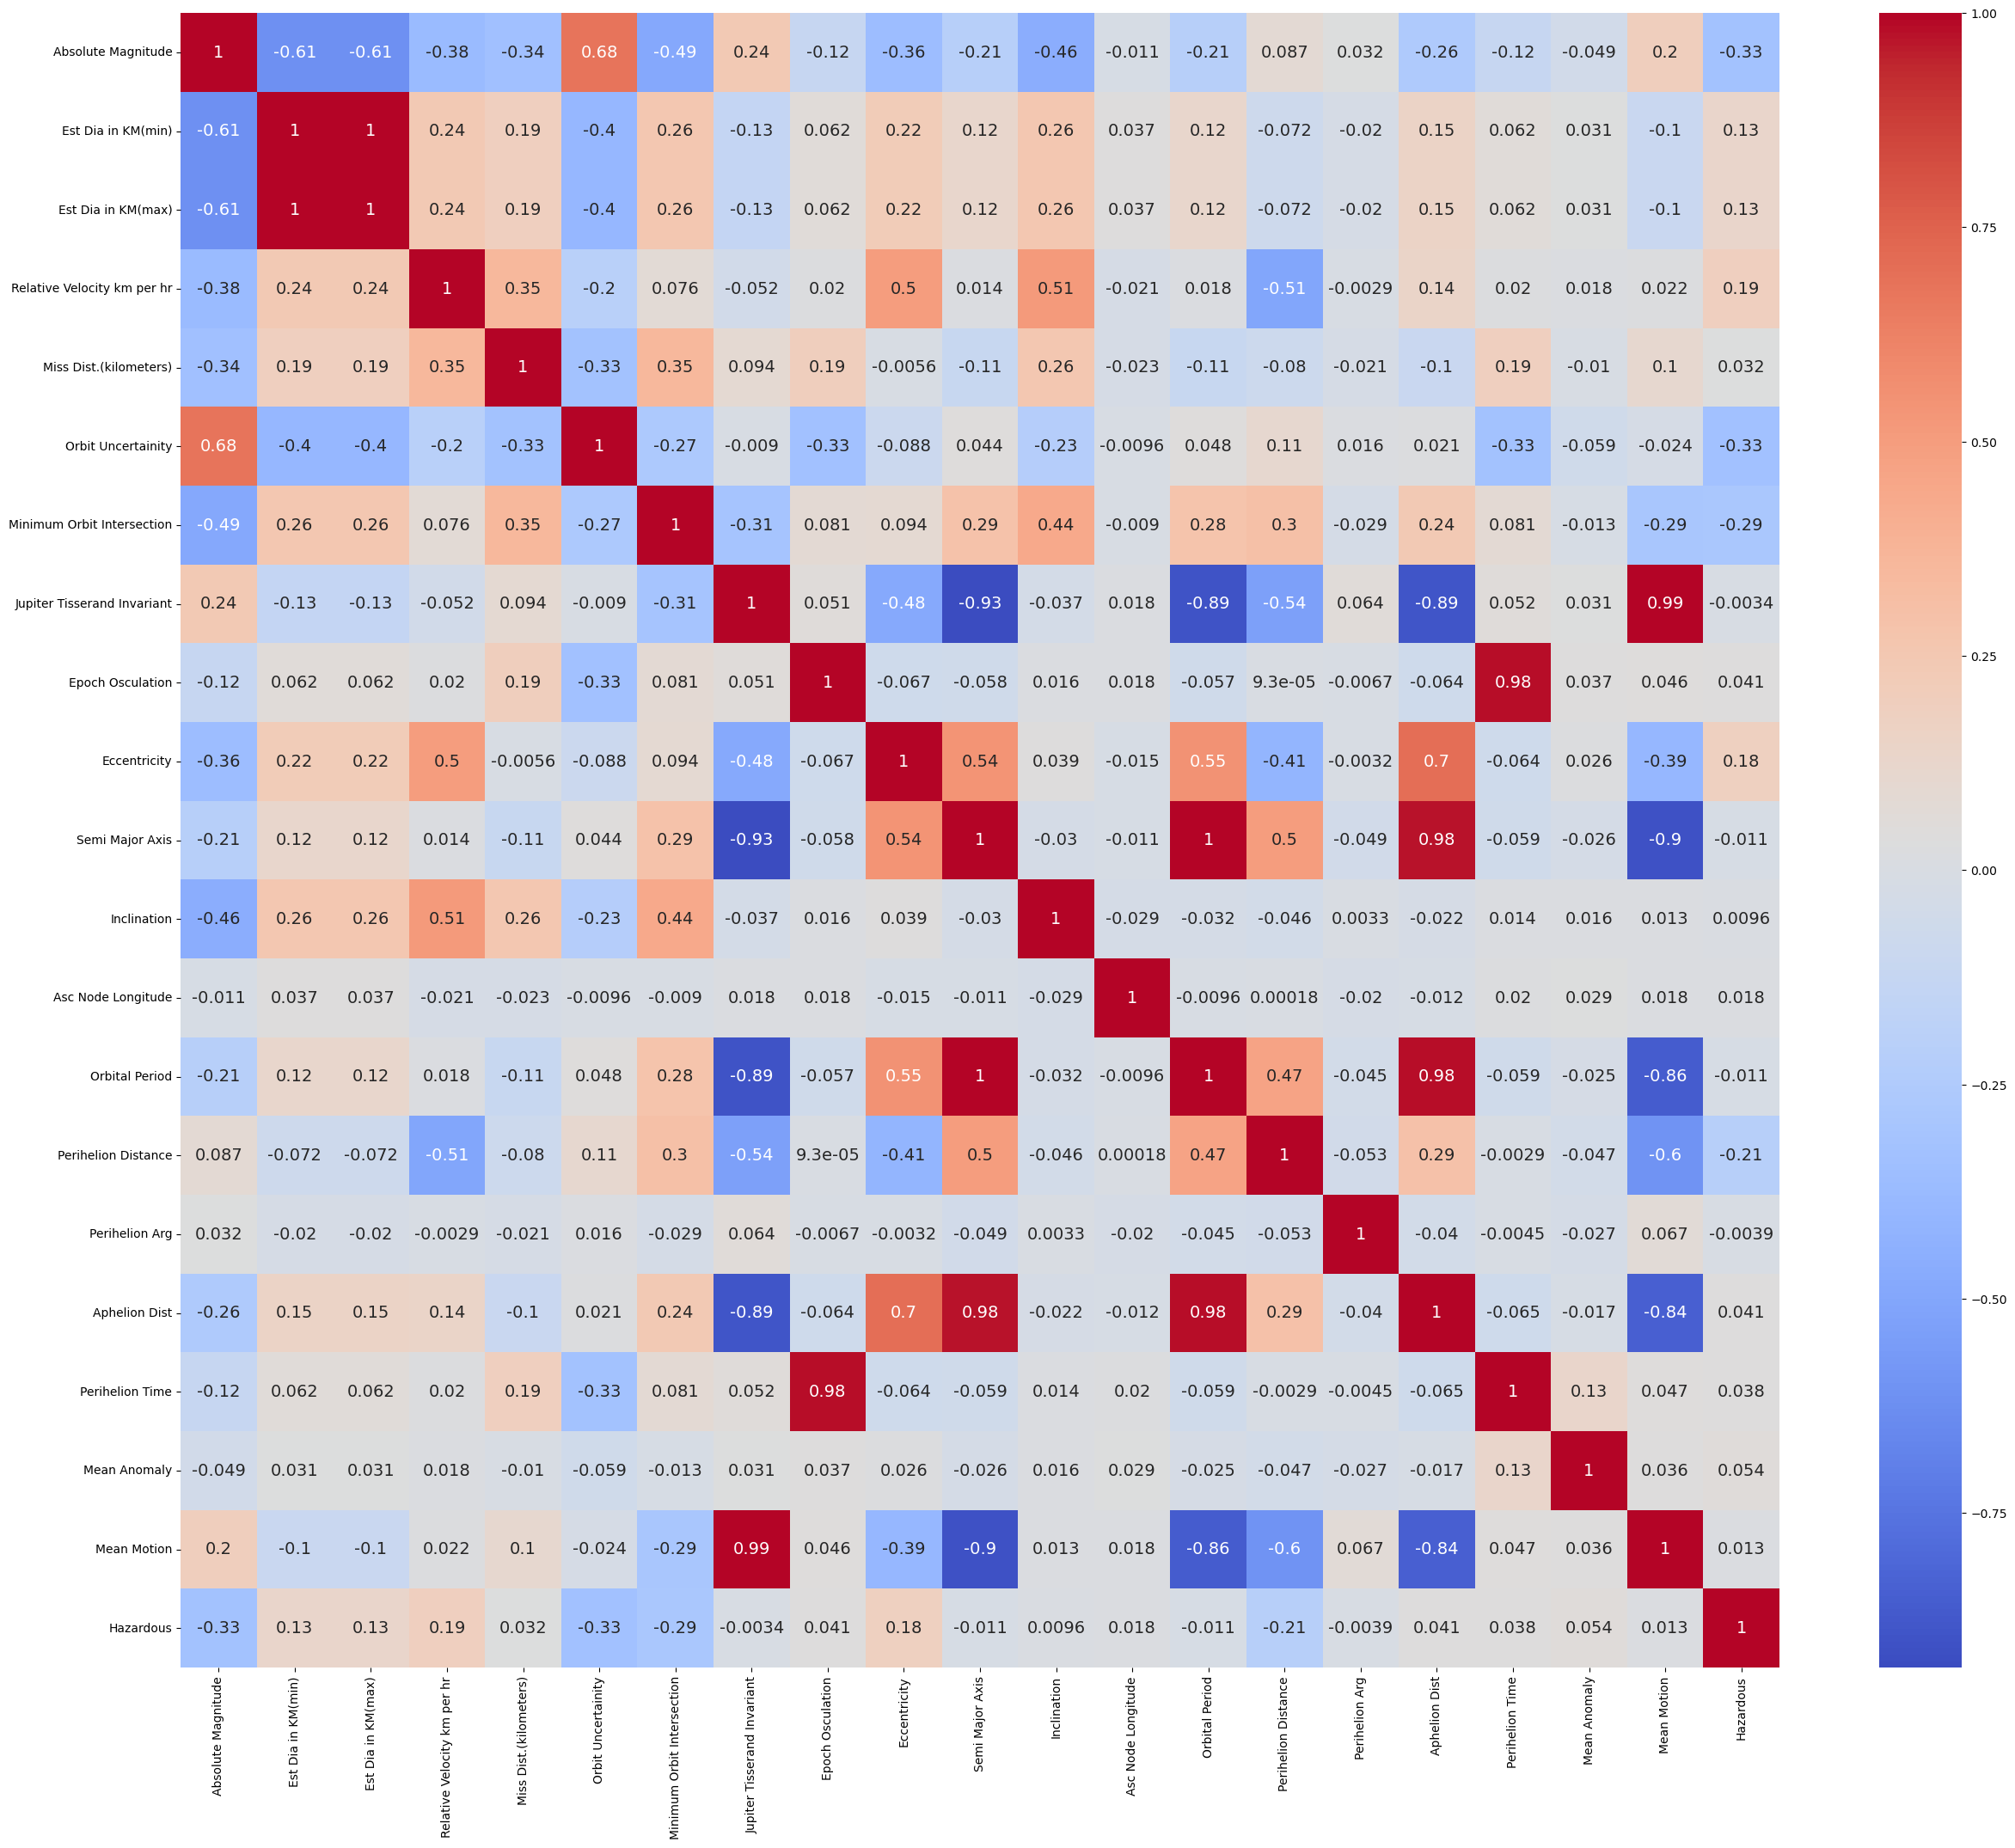

In [49]:
correlation = nasa_data.corr()
plt.figure(figsize=(30,25))
sb.heatmap(correlation, annot=True, cmap="coolwarm", annot_kws={"size": 14})
plt.show()

Checking the attributes with descending order of correlation to the 'Hazardous' class.

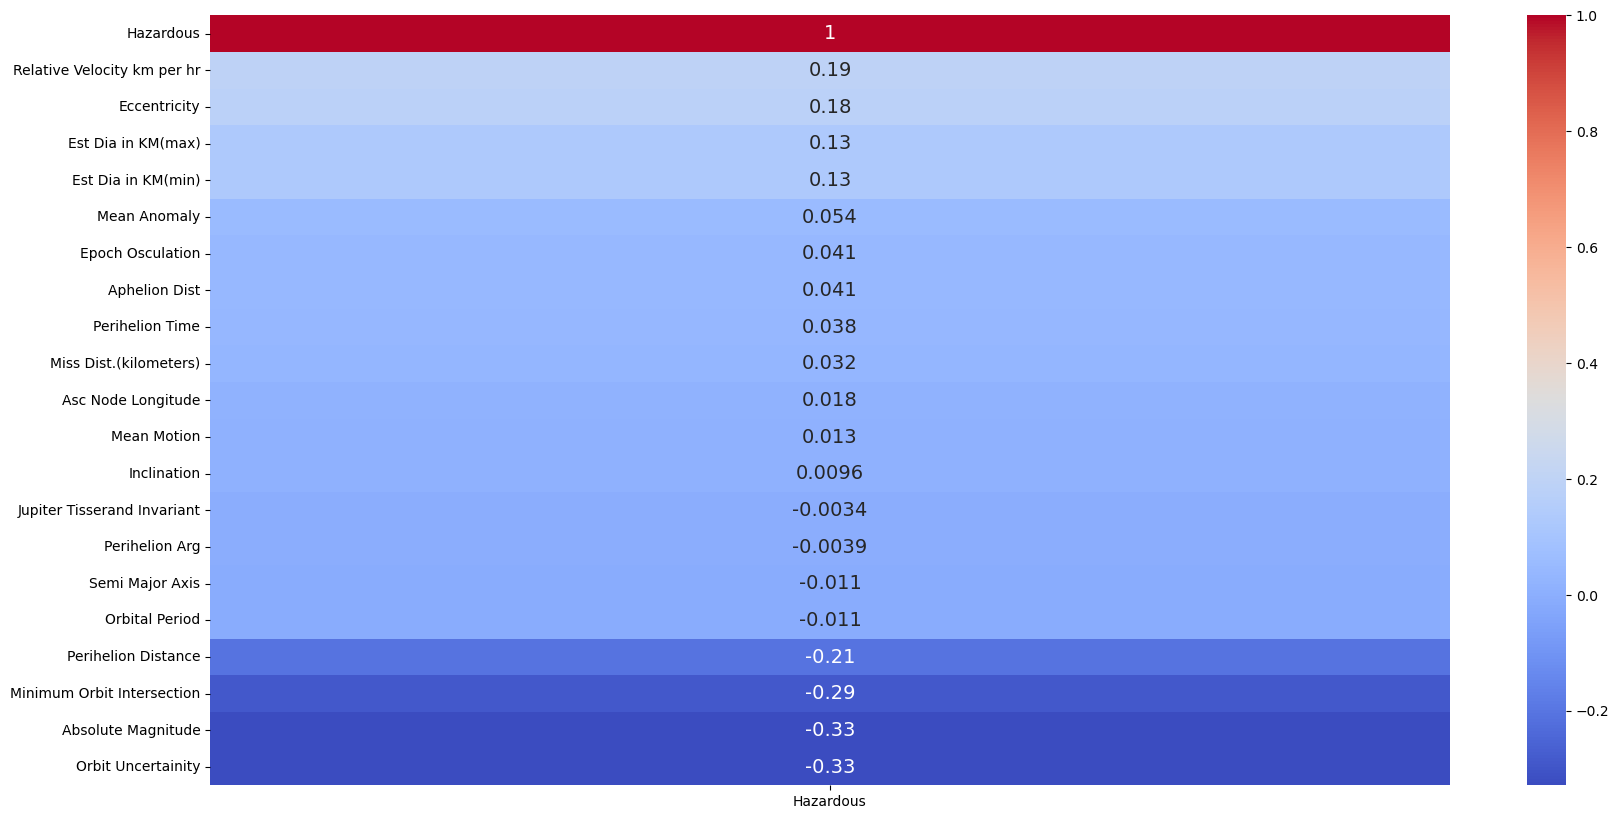

In [50]:
sorted_correlation = nasa_data.corr()[['Hazardous']].sort_values(by='Hazardous',ascending=False)
plt.figure(figsize=(20, 10))
sb.heatmap(sorted_correlation, annot=True, cmap='coolwarm', annot_kws={"size": 14})
plt.show()

Checking attributes that are highly correlated with each other.

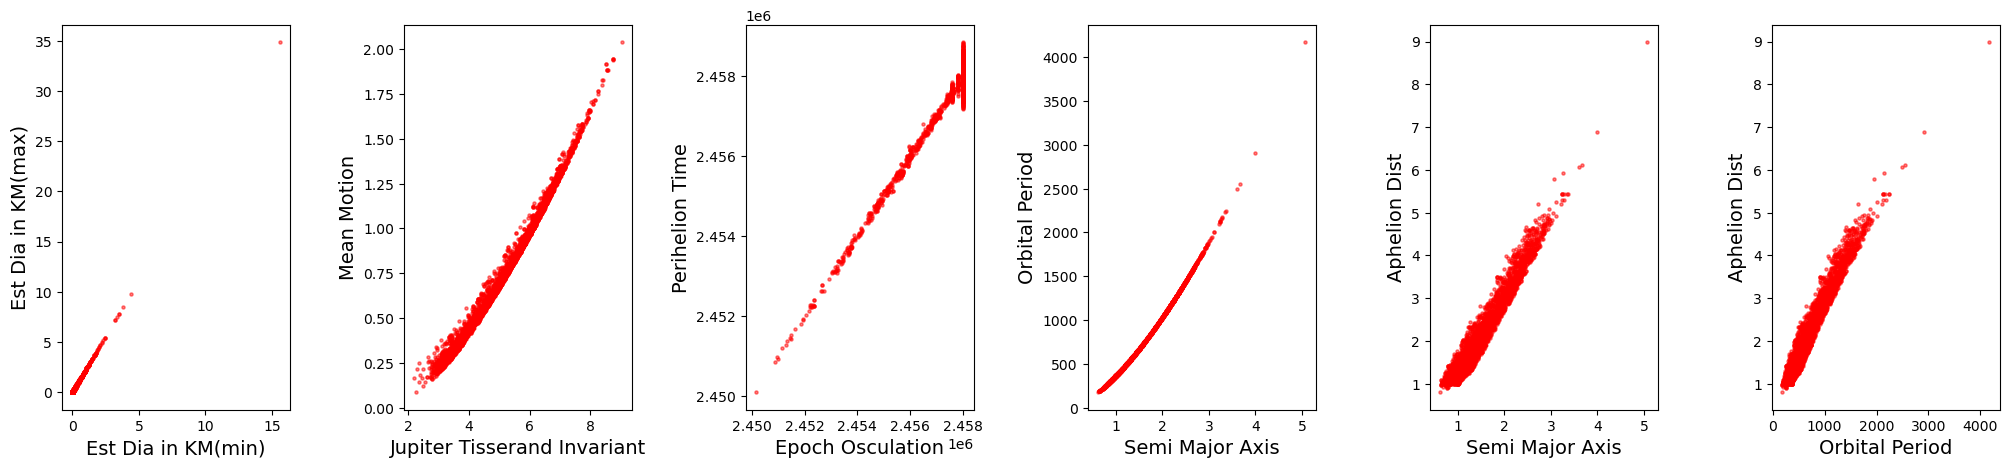

In [51]:
plot_cols = []

for column_index, column1 in enumerate(nasa_data.columns):
    if column1 == 'Hazardous':
        continue
    for column2 in nasa_data.columns[column_index + 1:]:
        if column2 == 'Hazardous':
            continue
        if abs(nasa_data[column1].corr(nasa_data[column2])) > 0.97:
            plot_cols.append([column1,column2])

plt.figure(figsize=(25,5))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

for column_index, column in enumerate(plot_cols):
    plt.subplot(1,6,column_index+1)
    plt.xlabel(f'{column[0]}',fontsize=14)
    plt.ylabel(f'{column[1]}',fontsize=14)
    plt.scatter(nasa_data[column[0]],nasa_data[column[1]],s=5,c='red',alpha=0.5)

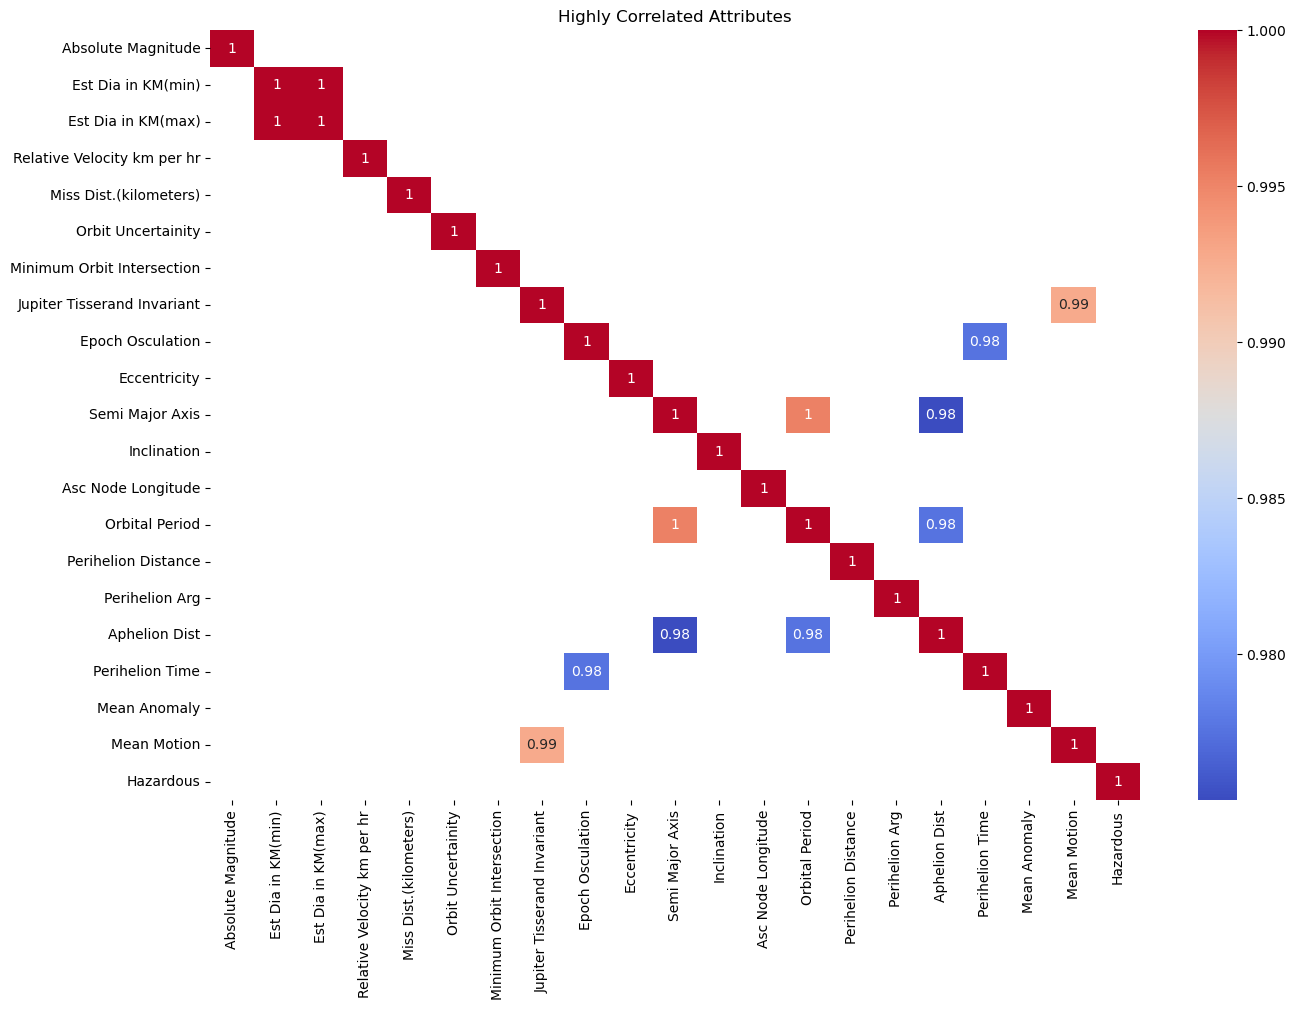

In [52]:
correlation_matrix = nasa_data.corr()

highly_correlated_attributes = correlation_matrix[correlation_matrix >= 0.97]

plt.figure(figsize=(15, 10))
sb.heatmap(highly_correlated_attributes, annot=True, cmap='coolwarm')
plt.title('Highly Correlated Attributes')
plt.show()

The 'Semi Major Axis' and 'Orbital Period' attributes exhibit a correlation of 1, indicating a strong relationship. The Semi Major Axis represents the average of an asteroid’s closest approach to Adalia and its furthest distance from Adalia and is measured in Astronomical Units, while the Orbital Period measures the amount of time it takes to complete one full orbit of the star Adalia. Since the Semi Major Axis can be converted into the Orbital Period and the latter is favored by the community for its time-based measure, we opt to drop the Semi Major Axis column. This simplifies the dataset without losing essential information, enhancing efficiency and interpretability in our analysis and modeling process.

In [53]:
nasa_data = nasa_data.drop(columns=["Semi Major Axis"])

There is no direct mathematical relationship between 'Mean Motion' and the 'Jupiter Tisserand Invariant', though both remain constant. 'Perihelion Time' refers to the specific moment when an asteroid is closest to the Sun. 'Epoch Osculation,' on the other hand, is the reference time or epoch at which the asteroid's orbital elements are calculated to be accurate.
As we can see, the 'Epoch Osculation' there is no relevancy for classifying an asteroid, it is just a reference time. So we can drop 'Epoch Osculation' and keep with 'Perihelion Time' that is more relevant for tracking the orbit of an asteroid.

In [54]:
nasa_data = nasa_data.drop(columns=['Epoch Osculation'])

The 'Aphelion Dist' is the point in an asteroid's orbit that is farthest from the Sun, while the 'Orbital Period' is the time it takes for the asteroid to complete one full orbit around the Sun. Given the high correlation between these two attributes in the dataset and how the 'Mean Motion' is inversely related to the 'Orbital Period' of the asteroid, we can drop the 'Orbital Period' and keep the 'Aphelion Dist' and 'Mean Motion' attributes as both already have information about 'Orbital Period'. Thus, we can reduce dimensionality while retaining essential information from the attributes.

In [55]:
nasa_data = nasa_data.drop(columns=['Orbital Period'])

The 'Est Dia in KM(min)' and 'Est Dia in KM(max)' attributes have a correlation of 1. It means they are perfectly correlated, and imply that they may contain redundant information. In this case, we can combine them to reduce redundancy and simplify the dataset. We can create a single representative attribute, the average diameter, to retain the useful information.

In [56]:
index = nasa_data.columns.get_loc('Est Dia in KM(min)')
avgEstDia = (nasa_data['Est Dia in KM(min)'] + nasa_data['Est Dia in KM(max)']) / 2
nasa_data = nasa_data.drop(columns=['Est Dia in KM(min)', 'Est Dia in KM(max)'])
nasa_data.insert(index, 'Avg Est Dia in KM', avgEstDia)

Now, we can look again at the correlations within the dataset to evaluate the impact of these changes.

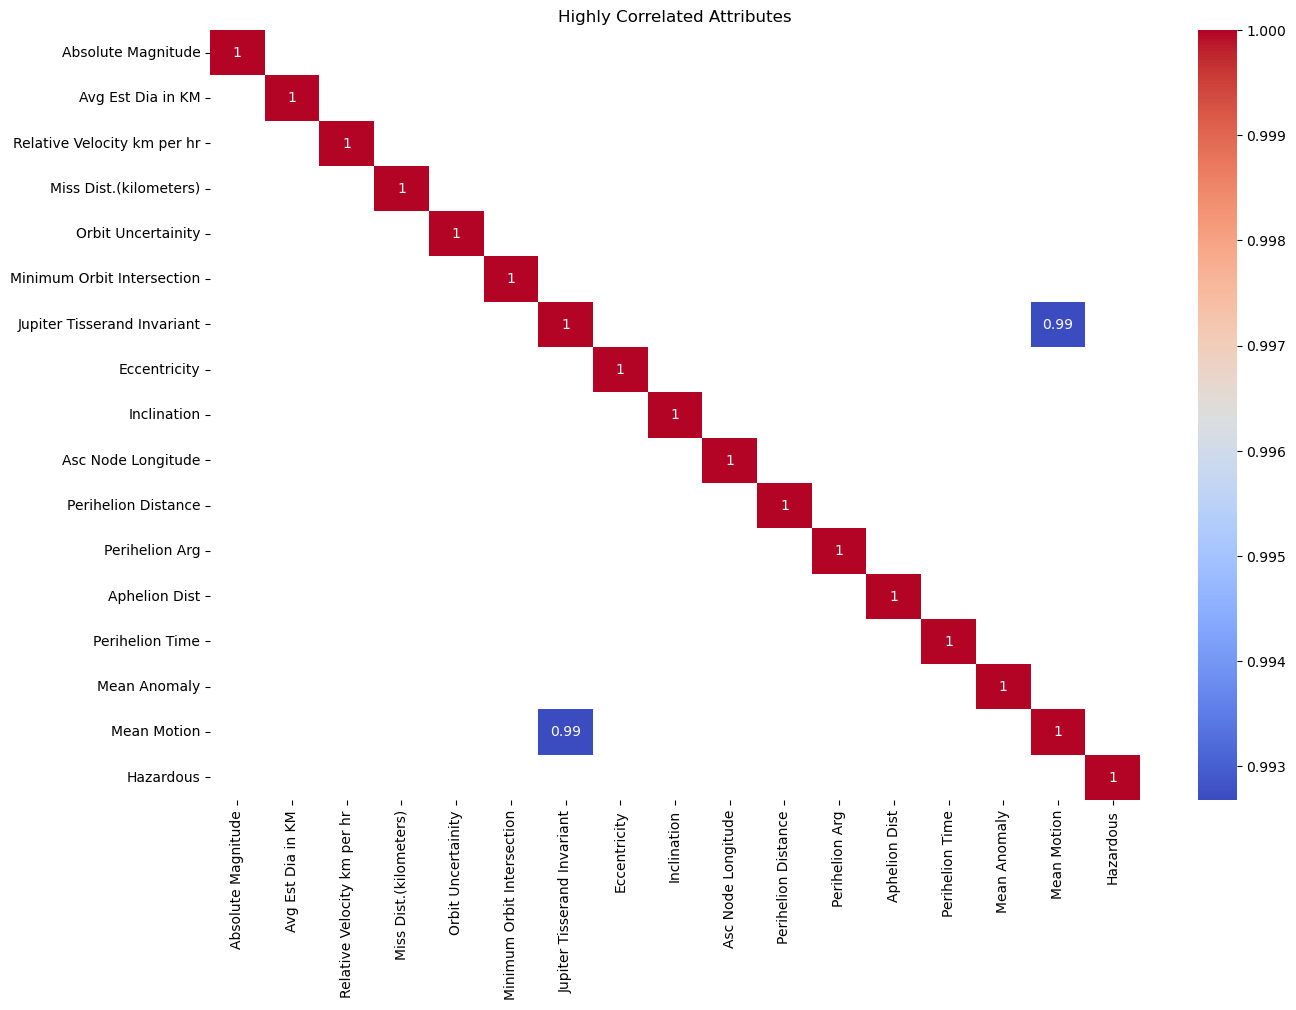

In [57]:
correlation_matrix = nasa_data.corr()

highly_correlated_attributes = correlation_matrix[correlation_matrix >= 0.97]

plt.figure(figsize=(15, 10))
sb.heatmap(highly_correlated_attributes, annot=True, cmap='coolwarm')
plt.title('Highly Correlated Attributes')
plt.show()

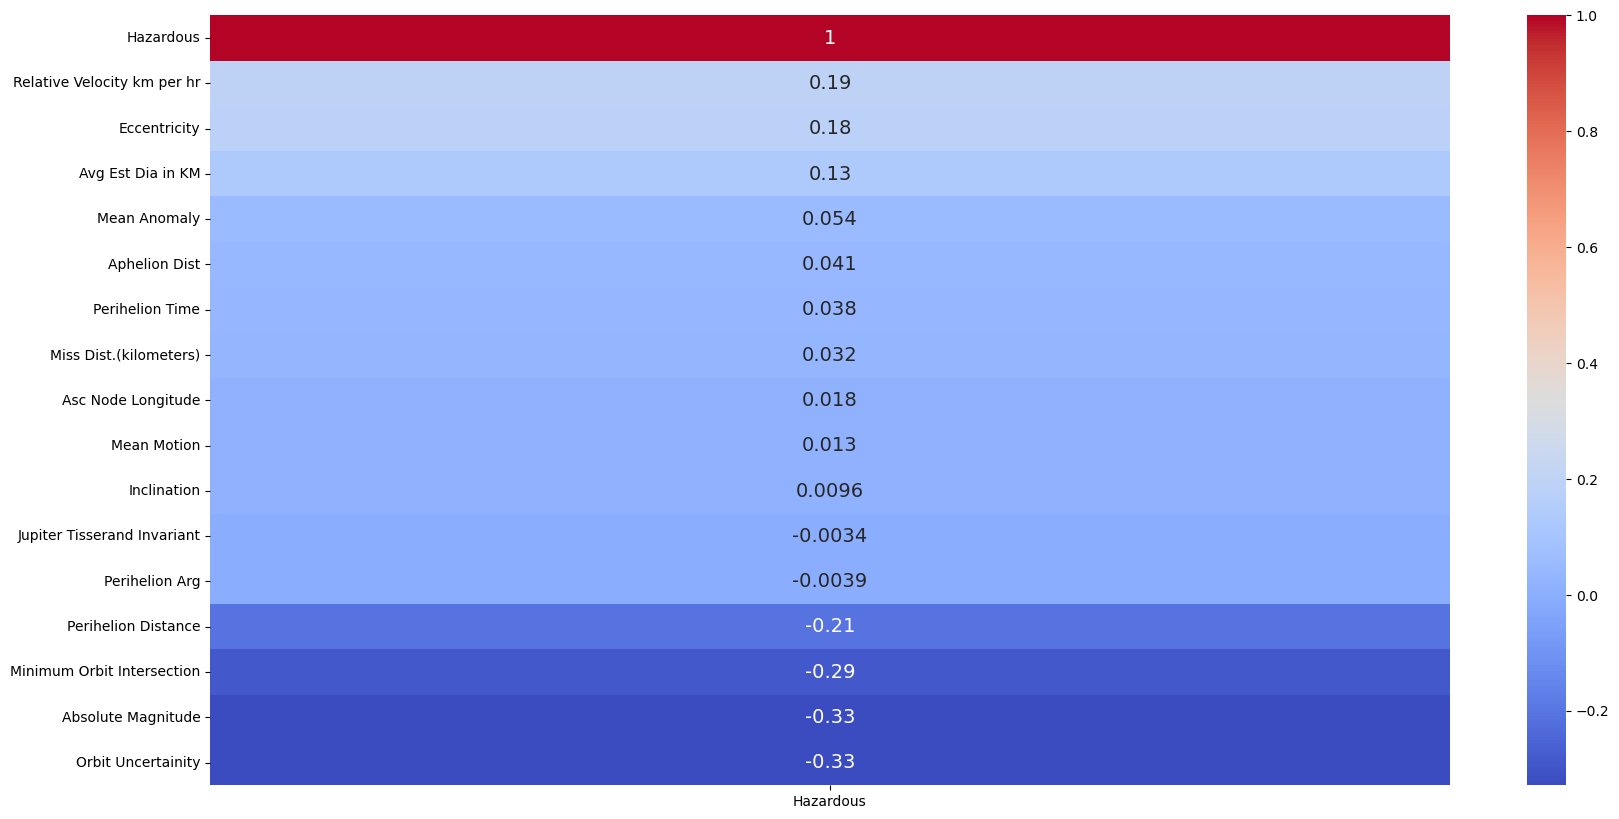

In [58]:
sorted_correlation = nasa_data.corr()[['Hazardous']].sort_values(by='Hazardous',ascending=False)
plt.figure(figsize=(20, 10))
sb.heatmap(sorted_correlation, annot=True, cmap='coolwarm', annot_kws={"size": 14})
plt.show()

#### Clean DataSet

After this work, we are left with the following information:

In [59]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Avg Est Dia in KM            4687 non-null   float64
 2   Relative Velocity km per hr  4687 non-null   float64
 3   Miss Dist.(kilometers)       4687 non-null   float64
 4   Orbit Uncertainity           4687 non-null   int64  
 5   Minimum Orbit Intersection   4687 non-null   float64
 6   Jupiter Tisserand Invariant  4687 non-null   float64
 7   Eccentricity                 4687 non-null   float64
 8   Inclination                  4687 non-null   float64
 9   Asc Node Longitude           4687 non-null   float64
 10  Perihelion Distance          4687 non-null   float64
 11  Perihelion Arg               4687 non-null   float64
 12  Aphelion Dist                4687 non-null   float64
 13  Perihelion Time   

Saving the clean dataset as a separate file with the name "nasa-data-clean.csv":

In [60]:
nasa_data.to_csv('dataset/nasa-data-clean.csv', index=False)

Now, using the clean dataset.

In [61]:
nasa_data = pd.read_csv('dataset/nasa-data-clean.csv')
nasa_data.head()

Absolute Magnitude  Avg Est Dia in KM  Relative Velocity km per hr  \
0                21.6           0.205846                 22017.003799   
1                21.3           0.236343                 65210.346095   
2                20.3           0.374578                 27326.560182   
3                27.4           0.014241                 40225.948191   
4                21.6           0.205846                 35426.991794   

   Miss Dist.(kilometers)  Orbit Uncertainity  Minimum Orbit Intersection  \
0              62753692.0                   5                    0.025282   
1              57298148.0                   3                    0.186935   
2               7622911.5                   0                    0.043058   
3              42683616.0                   6                    0.005512   
4              61010824.0                   1                    0.034798   

   Jupiter Tisserand Invariant  Eccentricity  Inclination  Asc Node Longitude  \
0                        4.634      0.425549     6.025981          314.373913   
1                        5.457      0.351674    28.412996          136.717242   
2                        4.557      0.348248     4.237961          259.475979   
3                        5.093      0.216578     7.905894           57.173266   
4                        5.154      0.210448    16.793382           84.629307   

   Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  \
0             0.808259       57.257470       2.005764     2.458162e+06   
1             0.718200      313.091975       1.497352     2.457795e+06   
2             0.950791      248.415038       1.966857     2.458120e+06   
3             0.983902       18.707701       1.527904     2.457902e+06   
4             0.967687      158.263596       1.483543     2.457814e+06   

   Mean Anomaly  Mean Motion  Hazardous  
0    264.837533     0.590551       True  
1    173.741112     0.845330      False  
2    292.893654     0.559371       True  
3     68.741007     0.700277      False  
4    135.142133     0.726395       True

### Histogram

Histograms showing the distribution of a specific attribute in the dataset.

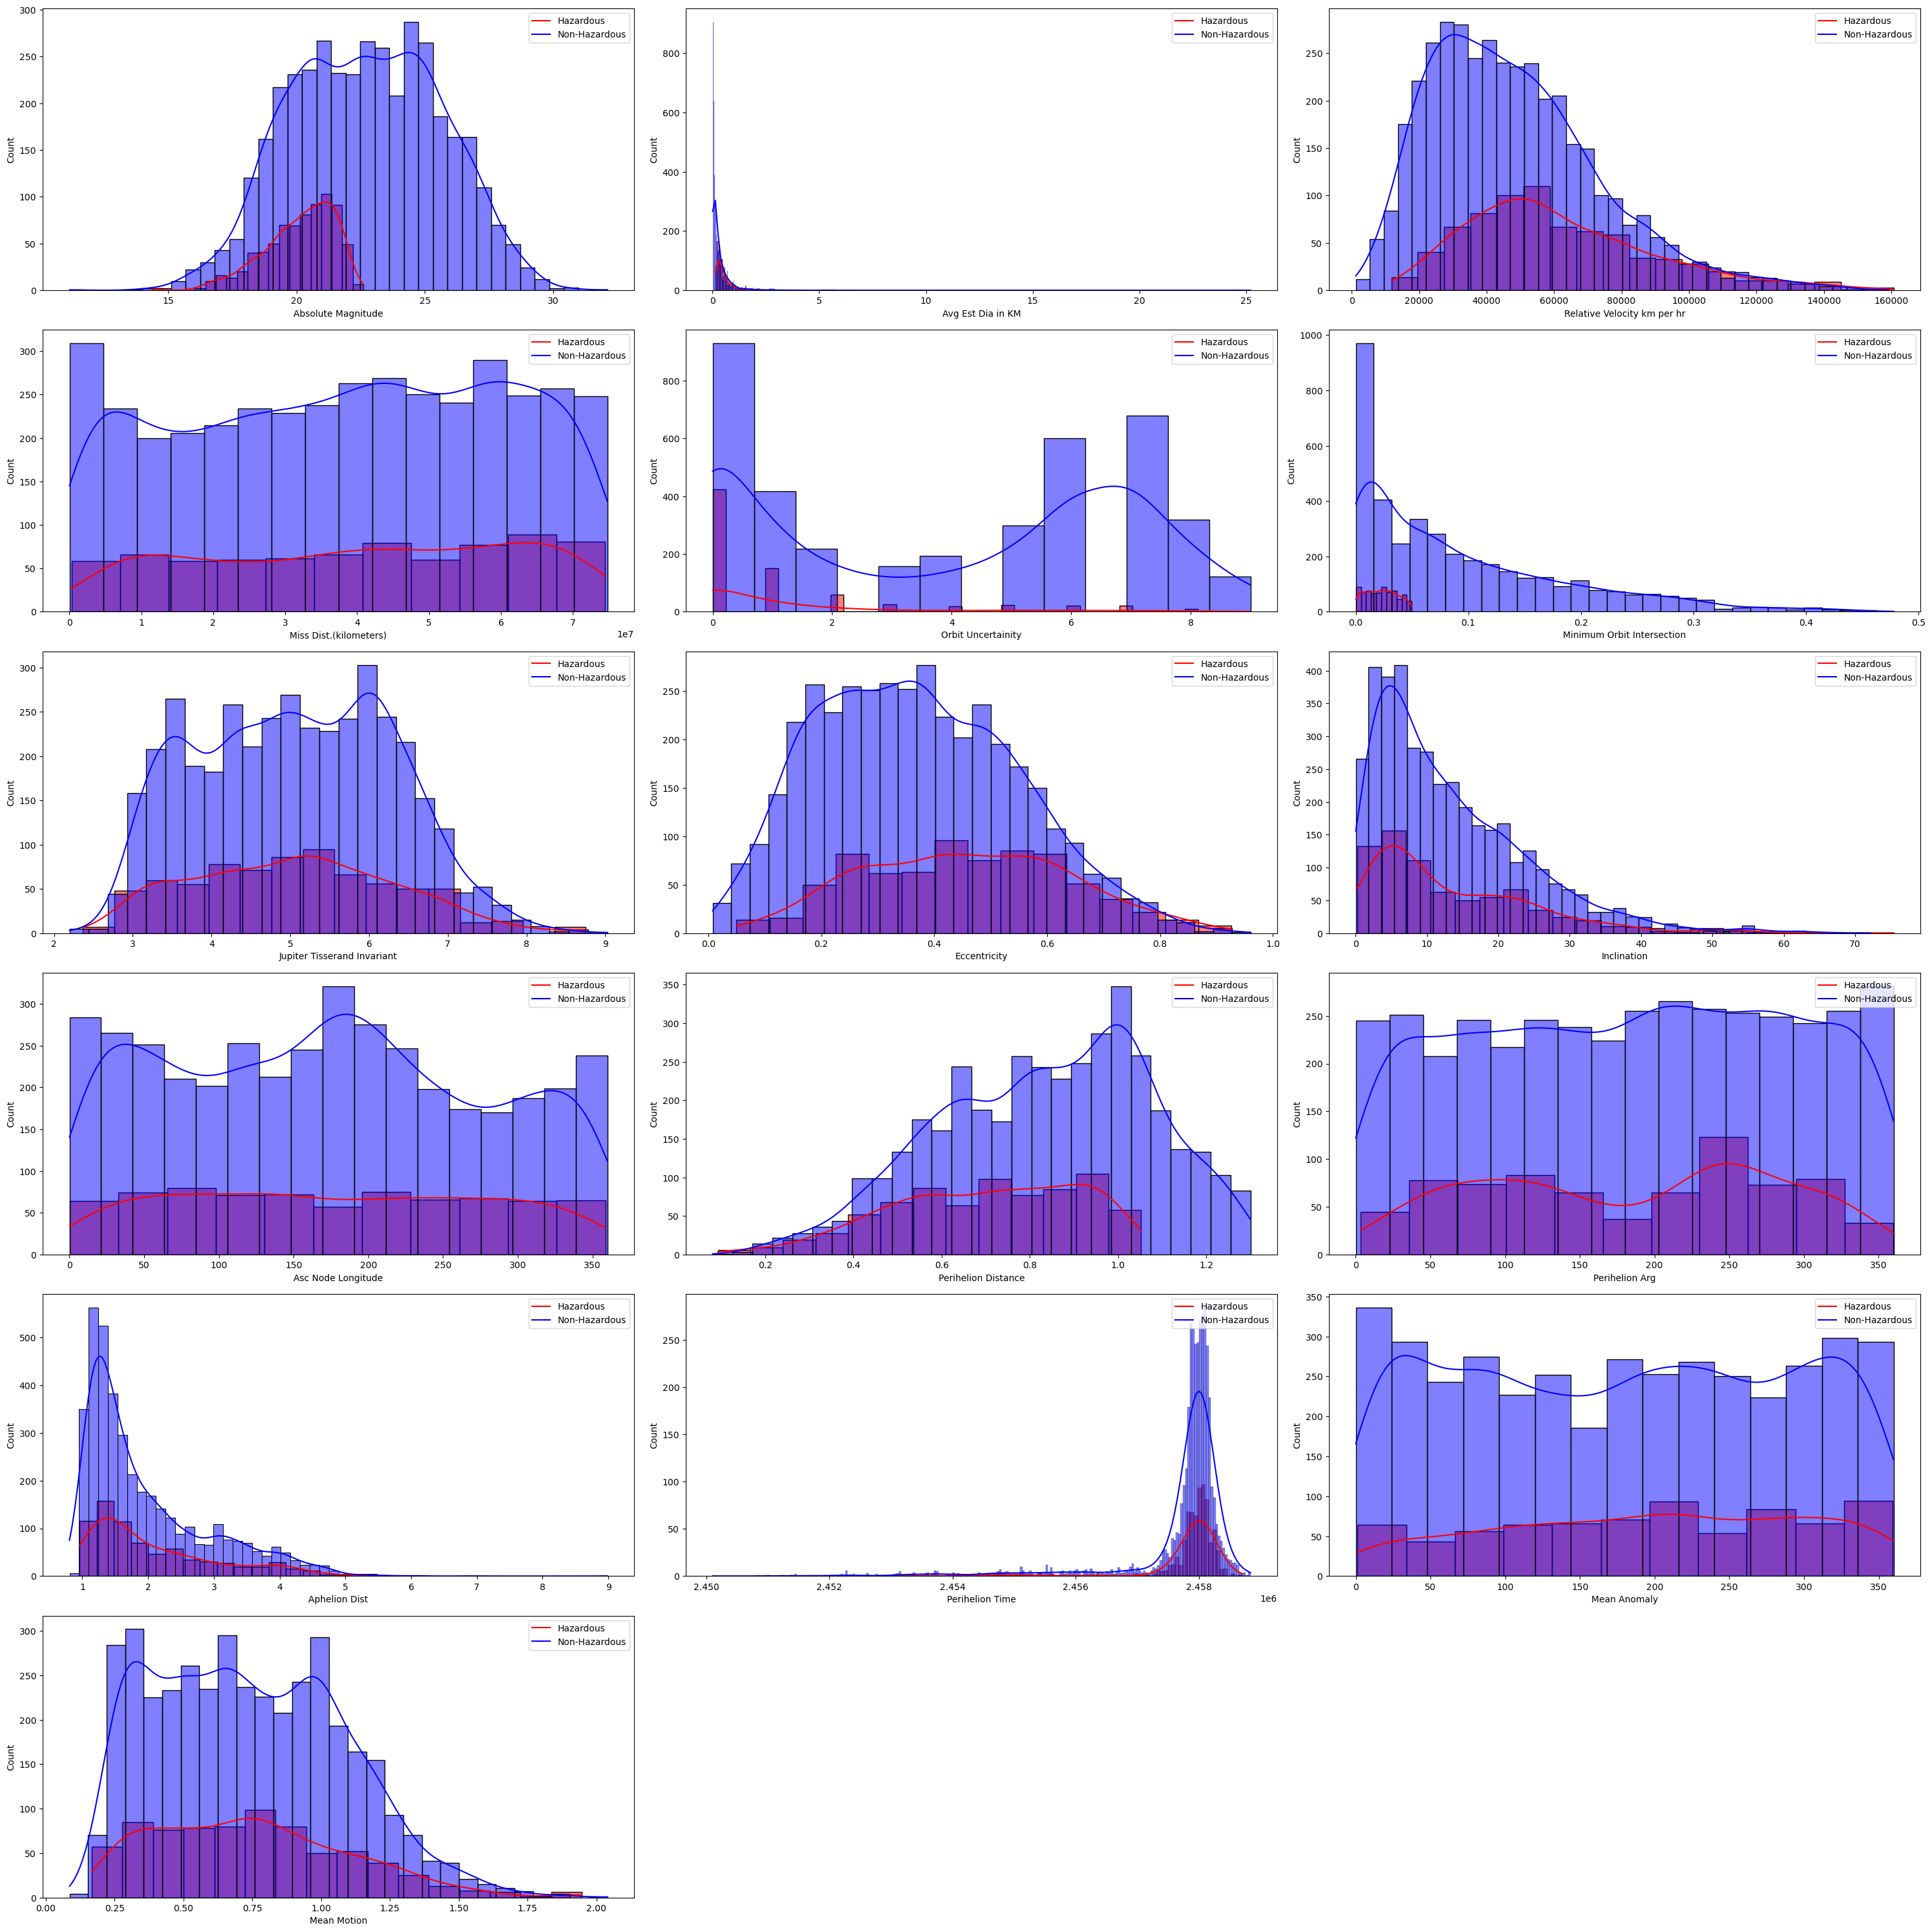

In [62]:
plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

for column_index, column in enumerate(nasa_data.columns):
    if column == 'Hazardous':
        continue
    plt.subplot(6, 3, column_index+1)
    sb.histplot(data=nasa_data.loc[nasa_data['Hazardous'] == True, column], color='red', label = 'Hazardous', kde=True)
    sb.histplot(data=nasa_data.loc[nasa_data['Hazardous'] == False, column], color='blue', label = 'Non-Hazardous', kde=True)
    plt.legend(['Hazardous', 'Non-Hazardous'], loc='upper right', prop={'size': 10})

plt.tight_layout()
plt.show()

From the histograms, we can observe that the distributions of hazardous and non-hazardous asteroids are quite similar, making it challenging to distinguish hazardous asteroids based on certain features alone. Despite these similar distributions, there are notable insights that can be drawn from the histograms:
- Absolute Magnitude: For hazardous asteroids, the values are concentrated in a range between 17 and 23. This concentration suggests that 'Absolute Magnitude' could be a relevant attribute for distinguishing hazardous asteroids.
- Minimum Orbit Intersection: Similarly, 'Minimum Orbit Intersection' values for hazardous asteroids are concentrated between 0.0 and 0.05. This indicates that this attribute is also relevant for identifying hazardous asteroids.
- Miss Distance (kilometers): The histogram for 'Miss Dist.(kilometers)' shows a flat distribution, indicating no specific range where hazardous asteroids are more probable. This suggests that 'Miss Dist. (kilometers)' might be a less relevant attribute for classification.
- Ascending Node Longitude: The 'Asc Node Longitude' also exhibits a flat distribution, indicating that it does not provide a clear distinction between hazardous and non-hazardous asteroids. Therefore, this attribute might be less relevant for classification purposes.

### Violin

Creating some violin plots of the data to compare the measurement distributions of the classes. Violin plots contain the same information as box plots, but also scales the box according to the density of the data.

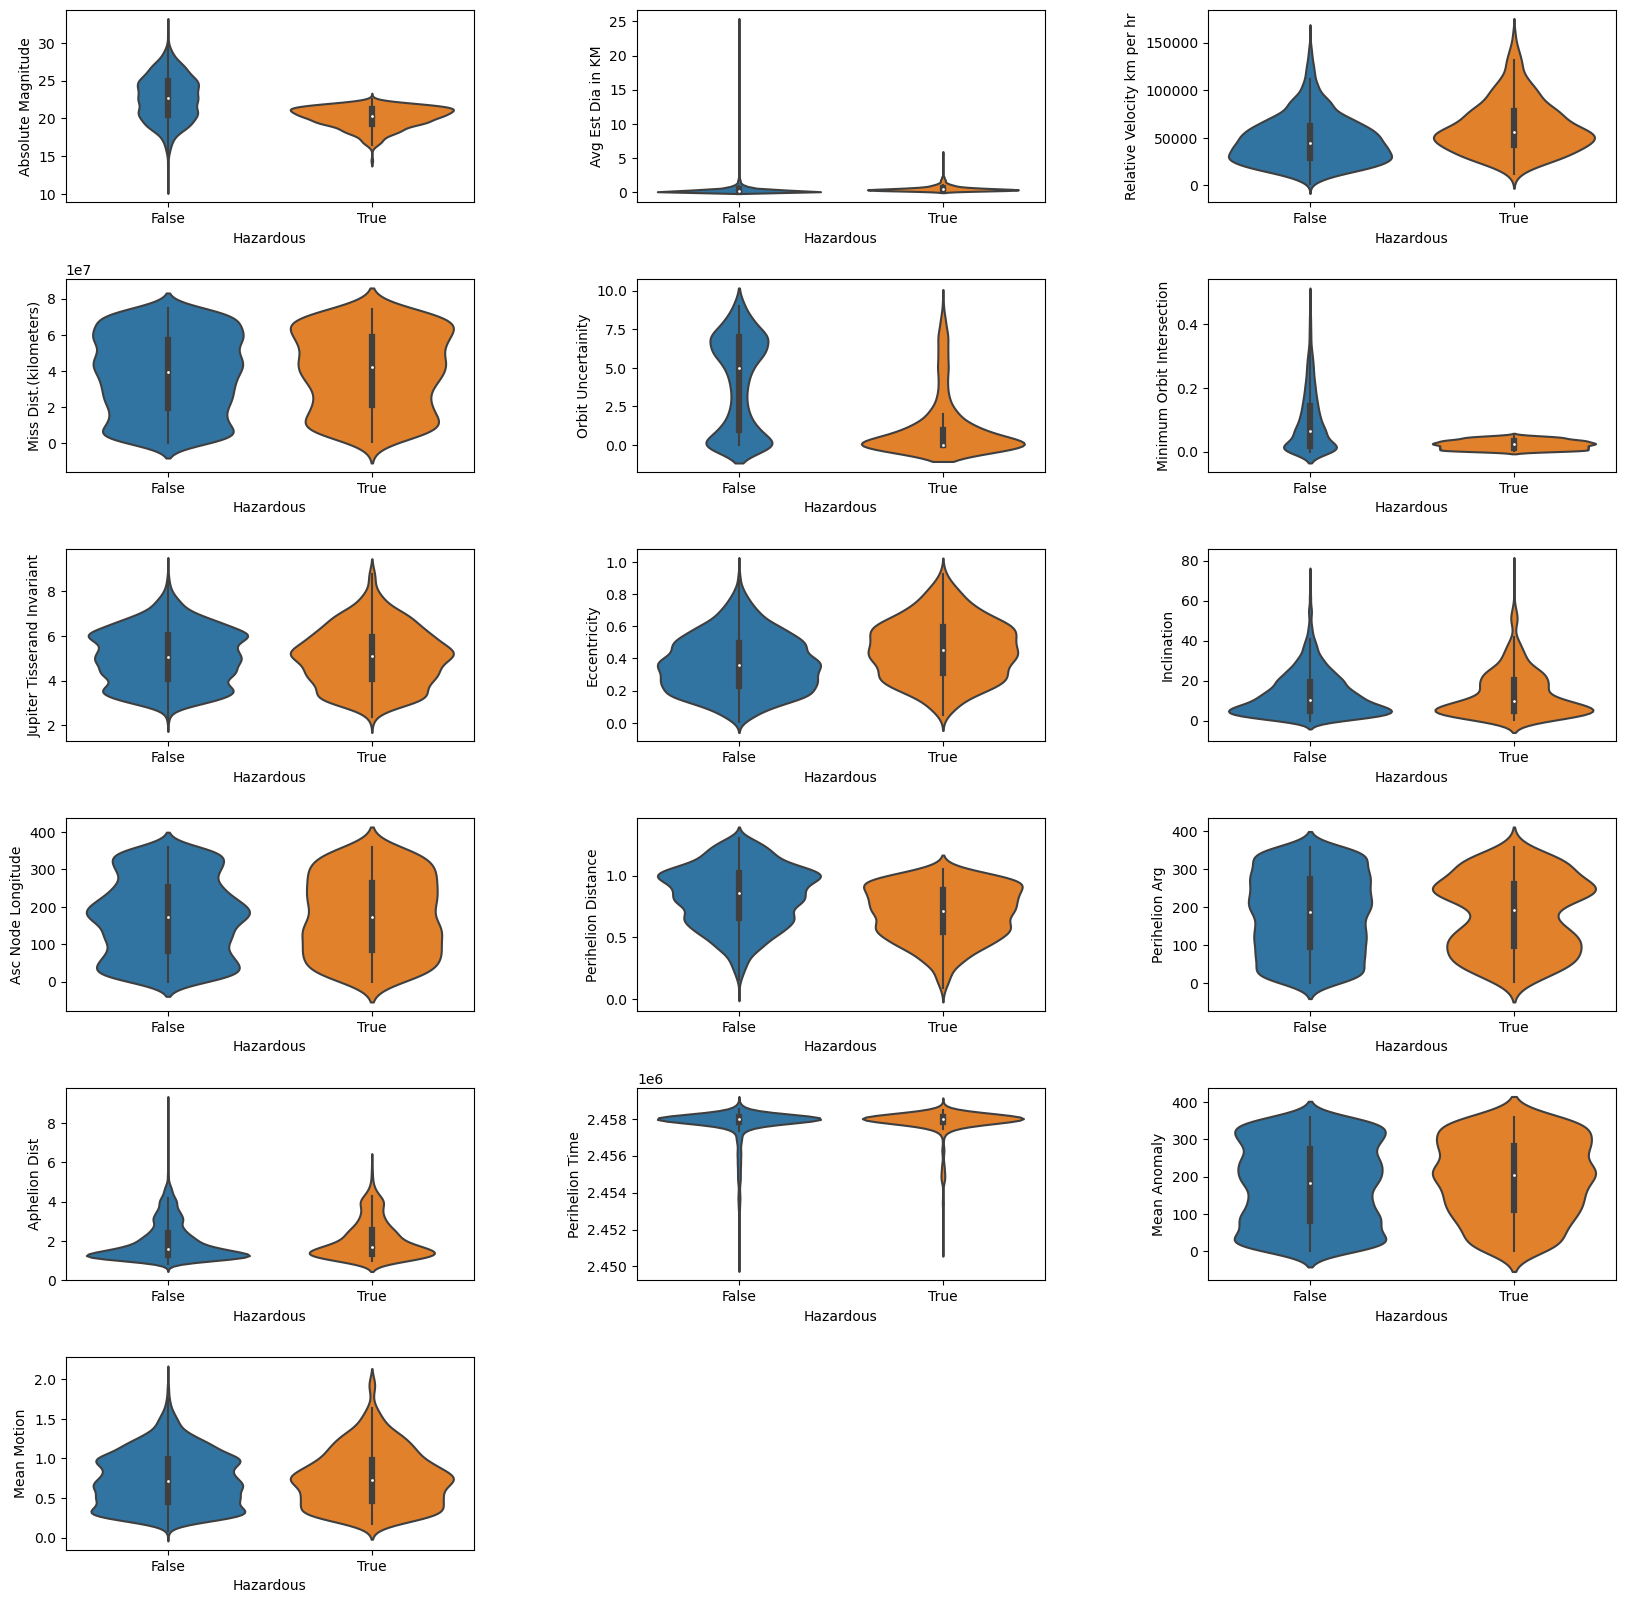

In [63]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(wspace=0.4,hspace=0.4)

for column_index, column in enumerate(nasa_data.columns):
    if column == 'Hazardous':
        continue
    plt.subplot(6, 3, column_index + 1)
    sb.violinplot(x='Hazardous', y=column, data=nasa_data)

From the violin plots, we can confirm some afirmations made before. We can see that most of the attributes has a similar shape for a hazardous and non-hazardous asteroid. It shows how hard is to classify an asteroid based on these attributes. It confirms too that 'Absolute Magnitude' and 'Minimum Orbit Intersection' are the most different ones.
But it shows that 'Orbit Uncertainity' has a very different shape too, indicating it can be relevant for the classification. On the other hand, it shows that 'Perihelion Time' has a very similar shape, indicating that maybe it is not a relevant attribute as we could have thought.

### Class Distribution

It is usefull to understand the class distribution of our dataset. This distribution can help us understand our dataset better and make better decisions that will optimize our goal. The information that we gain after analysing class distributions are:

- Class Imbalances;
- Model Selections;
- Model Evaluations;



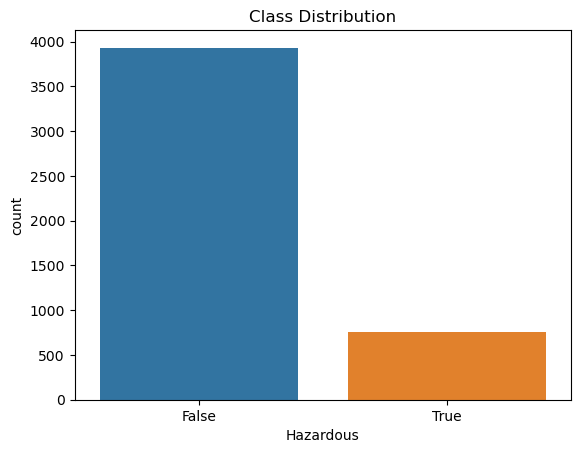

In [64]:
sb.countplot(data=nasa_data, x='Hazardous')
plt.title('Class Distribution')
plt.show()

###### Class Imbalance

In [65]:
class_count = nasa_data['Hazardous'].value_counts()
percentage = (class_count * 100 / len(nasa_data['Hazardous'])).round(2)

print((percentage.head(2).astype(str) + '%').to_string())

Hazardous
False    83.89%
True     16.11%


We can see that our target class is skewed to the False side, this means that there will exist some class imbalances, in which the model will be trained with more False values for hazardous than True. This may lead to some imprecisions biases and imprecisions in evaluating and testing the data later on.

Since the classes are imbalanced, this means that metrics such as accuracy migth not be so accurate, so we might stand to gain from using other evaluation metrics like f1-score, precision, recall or even ROC curves.

The imbalancement might also change our subsampling tecniques. We might need to oversample more instances of hazardous or undersample instances that not hazardous from our dataset to train the model in order for it to lose the imbalancement bias.

## Models

In [31]:
TRAINING_INPUTS = 0
TESTING_INPUTS = 1
TRAINING_CLASSES = 2
TESTING_CLASSES = 3

LINEAR = 0
HISTORY = 1

CONFUSION_MATRIX = 0
ACCURACY = 1
PRECISION = 2
RECALL = 3
F1_MEASURE = 4
TRAIN_TIME = 5
TEST_TIME = 6

DECISION_TREE = 0
MLP = 1
SVM = 2
KNN = 3

# Plot graphs 0 - Linear, 1 - Histogram
def plotGraph(values, title:str = "Title", xlabel:str = "xlabel", ylabel:str = "ylabel", type:int = 0, subplot=None, label=None, bar_width=None):
    if subplot:
        plt.subplot(subplot)

    match(type):
        case 0:
            plt.plot(values, label=label)
        case 1:
            if(bar_width):
              plt.hist(values, bins=30, edgecolor='black', label=label, rwidth=bar_width*0.9)
            else:
              plt.hist(values, bins=30, edgecolor='black', label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if not subplot:
        plt.show()

# Choose the best hyperparameters for the model classifier
def bestEstimator(model_classifier, parameter_grid, features: np.ndarray, labels: np.ndarray):
  cross_validation = StratifiedKFold(n_splits=10)

  grid_search = GridSearchCV(model_classifier,
                            param_grid=parameter_grid,
                            cv=cross_validation)

  smote = SMOTE(random_state=42)
  feat,lab = smote.fit_resample(features, labels)
  if (not isinstance(model_classifier, DecisionTreeClassifier)):
    scaler = StandardScaler()
    feat = scaler.fit_transform(feat)

  grid_search.fit(feat, lab)
  print('Best score: {}'.format(grid_search.best_score_))
  print('Best parameters: {}'.format(grid_search.best_params_))
  return grid_search.best_estimator_

# Do the cross-validation and return the accuracy scores for the k folds
def getCVScore(model_classifier, features:np.ndarray, labels:np.ndarray, n_splits:int = 10):
    cv = StratifiedKFold(n_splits=n_splits)
    if isinstance(model_classifier, DecisionTreeClassifier):
      pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)),('model_classifier', model_classifier)])
    else:
      pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)),('standardscaler', StandardScaler()),('model_classifier', model_classifier)])
    scores = cross_val_score(pipe, features, labels, cv=cv)
    return scores

# Train the model, test the model and gets the metrics from the results
def getPerformanceMetrics(model_classifier, params):
  # Get the Confusion Matrix
  def getConfusionMatrix(testing_predictions, params):
    return confusion_matrix(params[TESTING_CLASSES], testing_predictions)
  # Get the Accuracy Metric
  def getAccuracy(testing_predictions, params):
    return accuracy_score(params[TESTING_CLASSES], testing_predictions)
  # Get the Precision Metric
  def getPrecision(testing_predictions, params):
    return precision_score(params[TESTING_CLASSES], testing_predictions, zero_division=0)
  # Get the Recall Metric
  def getRecall(testing_predictions, params):
    return recall_score(params[TESTING_CLASSES], testing_predictions, zero_division=0)
  # Get de F1 Measure Metric
  def getF1Measure(testing_predictions, params):
    return f1_score(params[TESTING_CLASSES], testing_predictions, zero_division=0)

  if isinstance(model_classifier, DecisionTreeClassifier):
    pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)),('model_classifier', model_classifier)])
  else:
    pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)),('standardscaler', StandardScaler()),('model_classifier', model_classifier)])

  train_time = time.time()
  pipe.fit(params[TRAINING_INPUTS], params[TRAINING_CLASSES])
  train_time = time.time() - train_time

  test_time = time.time()
  testing_predictions = pipe.predict(params[TESTING_INPUTS])
  test_time = time.time() - test_time

  confusion_mat = getConfusionMatrix(testing_predictions, params)
  accuracy = getAccuracy(testing_predictions, params)
  precision = getPrecision(testing_predictions, params)
  recall = getRecall(testing_predictions, params)
  f1_measure = getF1Measure(testing_predictions, params)

  return confusion_mat, accuracy, precision, recall, f1_measure, train_time, test_time

# Print the metrics in a formating value
def printPerformanceMetrics(model_classifier, metrics):
    print(f'Performance Metrics for the {model_classifier.__class__.__name__}:')
    print(f'Confusion Matrix:\n{metrics[CONFUSION_MATRIX][0]}\n{metrics[CONFUSION_MATRIX][1]}')
    print(f'Accuracy: {(metrics[ACCURACY]*100).round(2)}%')
    print(f'Precision: {(metrics[PRECISION]*100).round(2)}%')
    print(f'Recall: {(metrics[RECALL]*100).round(2)}%')
    print(f'F1 Measure: {(metrics[F1_MEASURE]*100).round(2)}%')
    print(f'Time elapsed in training: {metrics[TRAIN_TIME]}s')
    print(f'Time elapsed in training: {metrics[TEST_TIME]}s')

# Print Cross-Validation Scores in a formating value
def printScores(model_classifier, scores:list[float]):
    print(f'Cross-validation Accuracies for {model_classifier.__class__.__name__}:')
    print(', '.join([f'{score*100:.2f}%' for score in scores]))
    print('Average Accuracy: {:.2f}%'.format(np.mean(scores)*100))

# Plot the Performance Metrics in a histogram
def plotPerformanceMetrics(model_classifier, metrics, repetitions = 500):
    plt.figure(figsize=(20,10))

    print(f'Performance Metrics for the {model_classifier.__class__.__name__}:')
    # Plot histogram of model accuracies
    plotGraph(metrics[ACCURACY], 'Histogram of Model Accuracies over ' + str(repetitions) + ' Repetitions', 'Accuracy', 'Frequency', HISTORY, subplot=321)
    plotGraph(metrics[PRECISION], 'Histogram of Model Precisions over ' + str(repetitions) + ' Repetitions', 'Precision', 'Frequency', HISTORY, subplot=322)
    plotGraph(metrics[RECALL], 'Histogram of Model Recalls over ' + str(repetitions) + ' Repetitions', 'Recall', 'Frequency', HISTORY, subplot=323)
    plotGraph(metrics[F1_MEASURE], 'Histogram of Model F1 Measures over ' + str(repetitions) + ' Repetitions', 'F1 Measure', 'Frequency', HISTORY, subplot=324)
    plotGraph(metrics[TRAIN_TIME], 'Histogram of Model Train Time over ' + str(repetitions) + ' Repetitions', 'Train Time (s)', 'Frequency', HISTORY, subplot=325)
    plotGraph(metrics[TEST_TIME], 'Histogram of Model Train Time over ' + str(repetitions) + ' Repetitions', 'Test Time (s)', 'Frequency', HISTORY, subplot=326)

    plt.tight_layout()
    plt.show()

#  Get the Performance Metrics from repetead trains and tests
def getRepeatedTrainTestResults(model_classifier, features:np.ndarray, labels:np.ndarray, repetitions:int = 100):
  accuracies:list[float] = []
  precisions:list[float] = []
  recalls:list[float] = []
  f1_measures:list[float] = []
  train_times:list[float] = []
  test_times:list[float] = []

  for _ in range(repetitions):
    params = train_test_split(features, labels, test_size=0.25, stratify=labels)

    _, accuracy, precision, recall, f1_measure, train_time, test_time = getPerformanceMetrics(model_classifier, params)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_measures.append(f1_measure)
    train_times.append(train_time)
    test_times.append(test_time)

  return _, accuracies, precisions, recalls, f1_measures, train_times, test_times

# Make and display the Learning Curve from model classifiers
def learningCurve(classifiers, features, labels, splits=50, trainings=5):
  _, ax = plt.subplots()

  common_params = {
      "X": features,
      "y": labels,
      "train_sizes": np.linspace(0.1, 1.0, trainings),
      "cv": ShuffleSplit(n_splits=splits, test_size=0.2, random_state=42),
      "score_type": "both",
      "n_jobs": 4,
      "line_kw": {"marker": "o"},
      "std_display_style": None,
      "score_name": "Accuracy",
  }
    
  label_names = []
  for classifier in classifiers:
    if isinstance(classifier, DecisionTreeClassifier):
      pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)),('model_classifier', classifier)])
    else:
      pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)),('standardscaler', StandardScaler()),('model_classifier', classifier)])
    LearningCurveDisplay.from_estimator(pipe, **common_params, ax=ax)
    label_names.append(classifier.__class__.__name__ + " Training Score")
    label_names.append(classifier.__class__.__name__ + " Test Score")
  handles, label = ax.get_legend_handles_labels()
  ax.legend(handles[:len(classifiers)*2], label_names)
  ax.set_title(f"Learning Curve")

# Make and display the ROC Curve from model classifiers
def ROC_curve(classifiers, params):
  plt.figure()
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

  for classifier in classifiers:
    if isinstance(classifier, DecisionTreeClassifier):
      pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)),('model_classifier', classifier)])
    else:
      pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)),('standardscaler', StandardScaler()),('model_classifier', classifier)])

    pipe.fit(params[TRAINING_INPUTS], params[TRAINING_CLASSES])

    testing_prob = pipe.predict_proba(params[TESTING_INPUTS])[::,1]

    # ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(params[TESTING_CLASSES], testing_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=classifier.__class__.__name__ + ' ROC curve (area = %0.2f)' % roc_auc)

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

# Create a dataFrame from the cleaned dataset
nasa_data_clean = pd.read_csv('dataset/nasa-data-clean.csv')

features = nasa_data_clean.drop(columns=["Hazardous"]).values
labels:np.ndarray = nasa_data_clean['Hazardous'].values

params = train_test_split(features, labels, test_size=0.25, stratify=labels, random_state=42)

### Decision Tree

#### Best Score and Parameters

In [31]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_features': [8,9,10,11,12,13,14,15,16,17]}

decision_tree_classifier = bestEstimator(decision_tree_classifier, parameter_grid, features, labels)

Best score: 0.9977123485649436
Best parameters: {'criterion': 'gini', 'max_features': 11, 'splitter': 'best'}


#### Cross-Validation Accuracies

In [32]:
scores = getCVScore(decision_tree_classifier, features, labels)
printScores(decision_tree_classifier, scores)

Cross-validation Accuracies for DecisionTreeClassifier:
99.79%, 99.79%, 99.57%, 99.15%, 99.79%, 100.00%, 99.57%, 99.57%, 100.00%, 100.00%
Average Accuracy: 99.72%


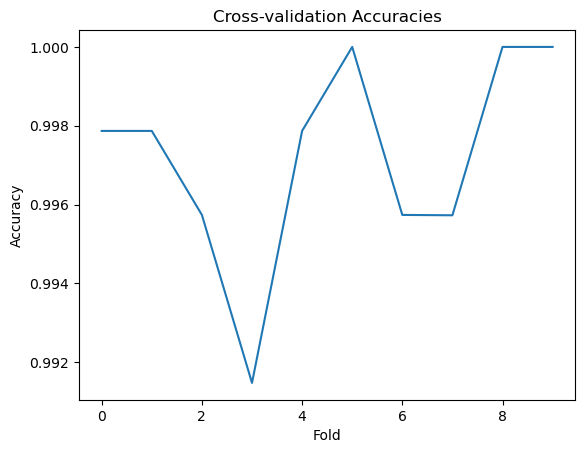

In [33]:
plotGraph(scores, 'Cross-validation Accuracies', 'Fold', 'Accuracy')

#### Model and Performance Metrics

In [73]:
decision_tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=11, splitter='best', random_state=42)

metrics = getPerformanceMetrics(decision_tree_classifier, params)

printPerformanceMetrics([decision_tree_classifier], metrics)

Performance Metrics for the list:
Confusion Matrix:
[982   1]
[  1 188]
Accuracy: 99.83%
Precision: 99.47%
Recall: 99.47%
F1 Measure: 99.47%
Time elapsed in training: 0.0512998104095459s
Time elapsed in training: 0.0015361309051513672s


#### Performance Metrics Over X Repetitions

Performance Metrics for the DecisionTreeClassifier:


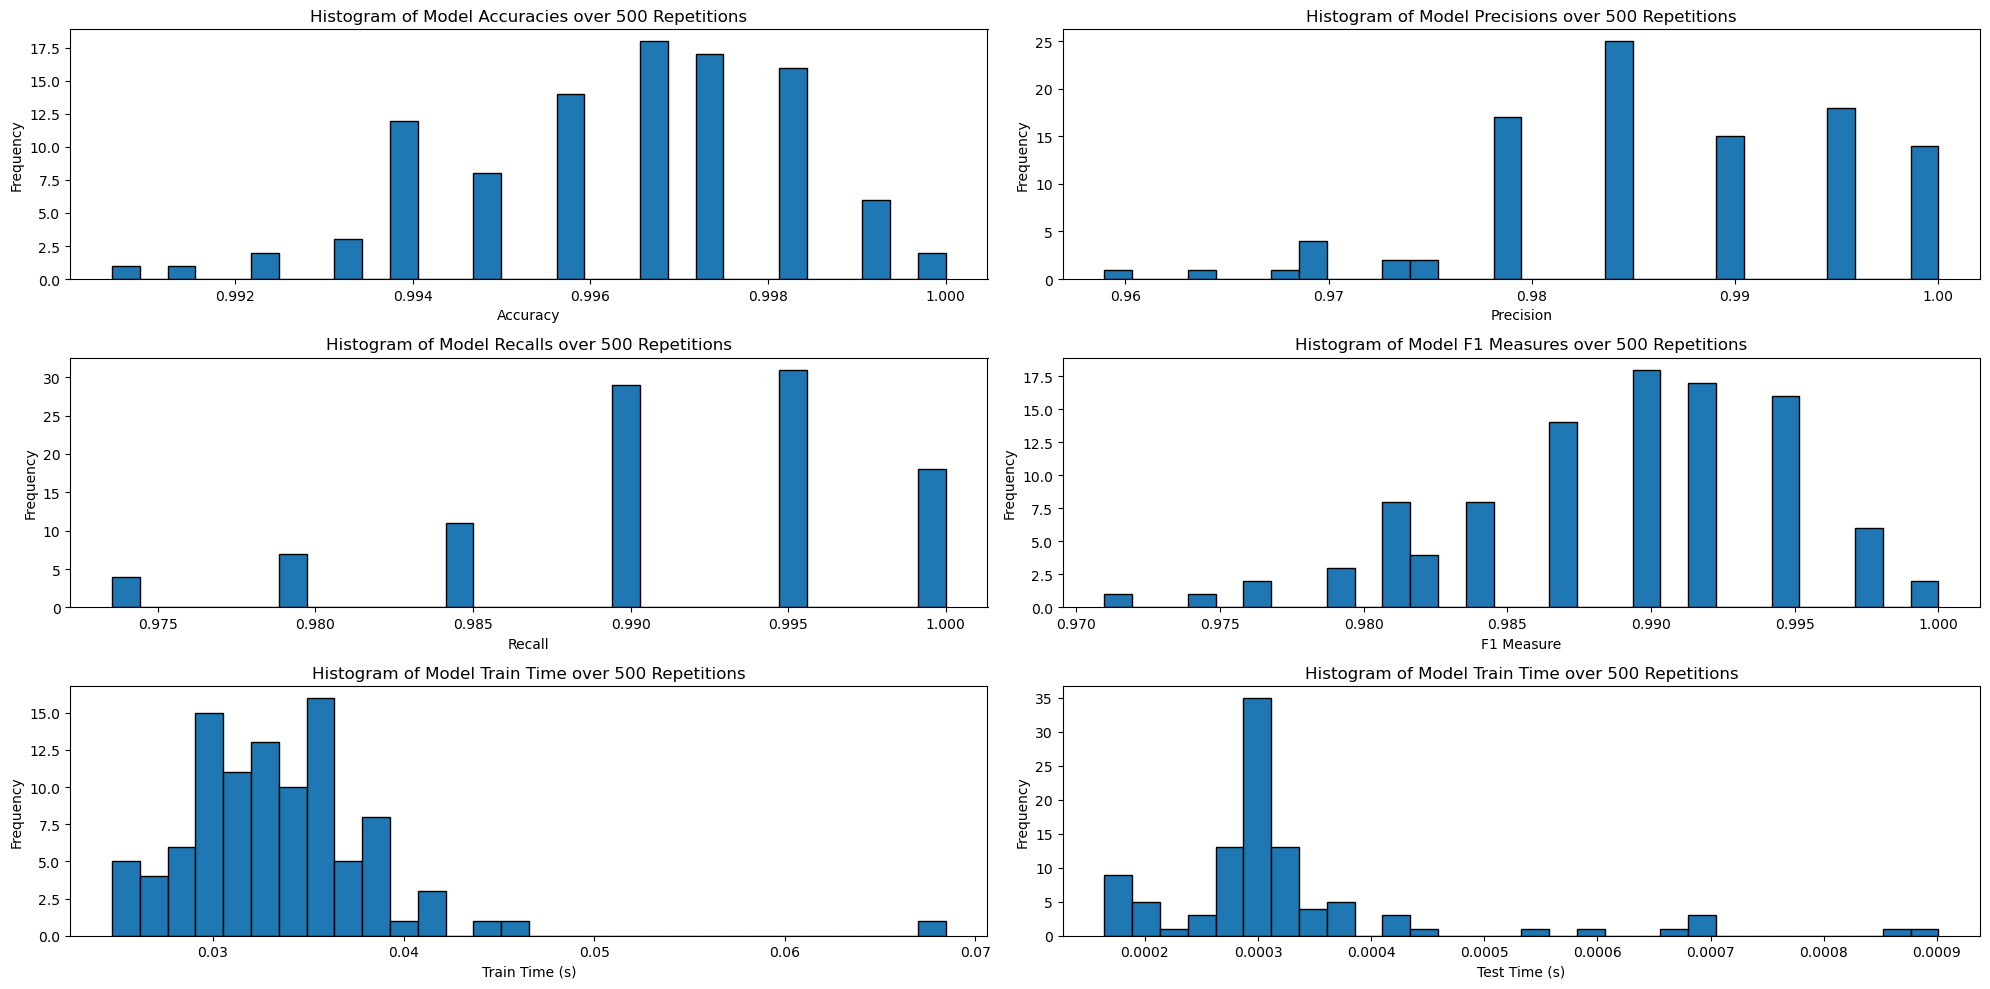

In [74]:
metrics = getRepeatedTrainTestResults(decision_tree_classifier, features, labels)

plotPerformanceMetrics(decision_tree_classifier, metrics)

#### Learning Curve

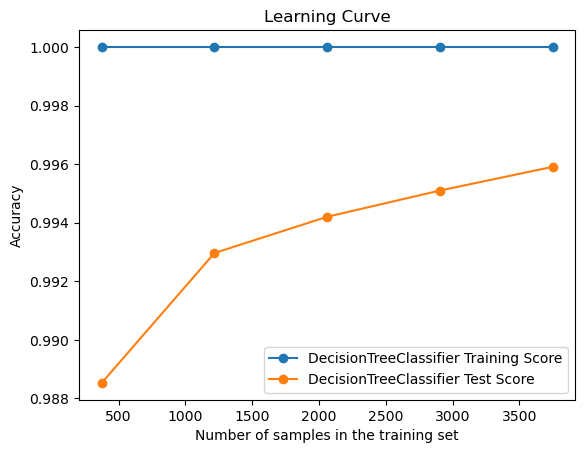

In [75]:
learningCurve([decision_tree_classifier], features, labels)

#### ROC

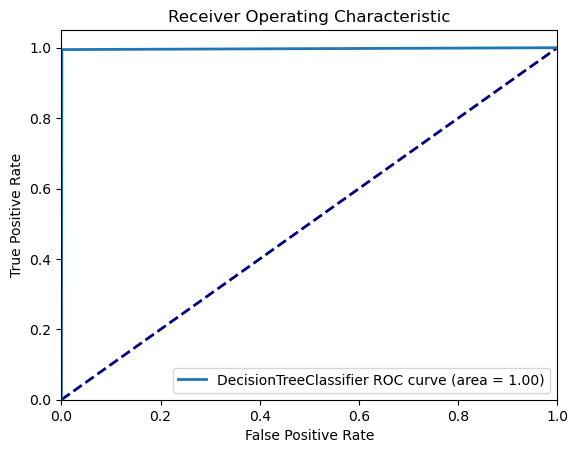

In [76]:
ROC_curve([decision_tree_classifier], params)

### Neural Network

#### Best Score and Parameters

In [38]:
mlp_classifier = MLPClassifier()

parameter_grid = {'max_iter': [200, 300],
                  'learning_rate': ['constant', 'invscaling', 'adaptive'],
                  'solver': ['lbfgs', 'sgd', 'adam']}

mlp_classifier = bestEstimator(mlp_classifier, parameter_grid, features, labels)

Best score: 0.9958054065588717
Best parameters: {'learning_rate': 'constant', 'max_iter': 200, 'solver': 'lbfgs'}


#### Cross-Validation Accuracies

In [39]:
scores = getCVScore(mlp_classifier, features, labels)
printScores(mlp_classifier, scores)

Cross-validation Accuracies for MLPClassifier:
98.29%, 98.29%, 97.65%, 97.44%, 98.93%, 98.93%, 99.36%, 99.36%, 99.57%, 99.15%
Average Accuracy: 98.70%


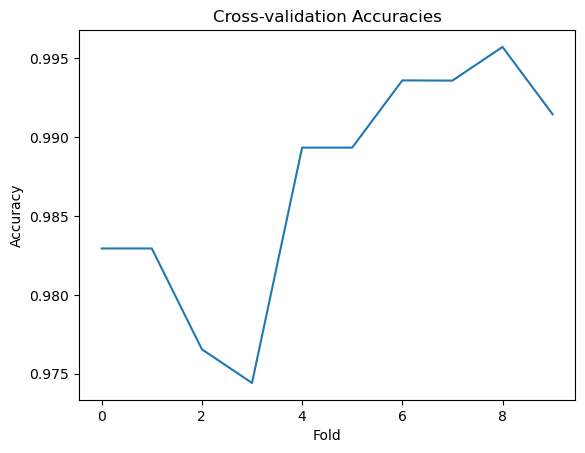

In [40]:
plotGraph(scores, 'Cross-validation Accuracies', 'Fold', 'Accuracy')

#### Performance Metrics

In [41]:
mlp_classifier = MLPClassifier(solver='lbfgs', max_iter=200, learning_rate='constant',random_state=42)

metrics = getPerformanceMetrics(mlp_classifier, params)

printPerformanceMetrics(mlp_classifier, metrics)

Performance Metrics for the MLPClassifier:
Confusion Matrix:
[976   7]
[ 11 178]
Accuracy: 98.46%
Precision: 96.22%
Recall: 94.18%
F1 Measure: 95.19%
Time elapsed in training: 0.5729341506958008s
Time elapsed in training: 0.0015110969543457031s


#### Performance Metrics Over X Repetitions

Performance Metrics for the MLPClassifier:


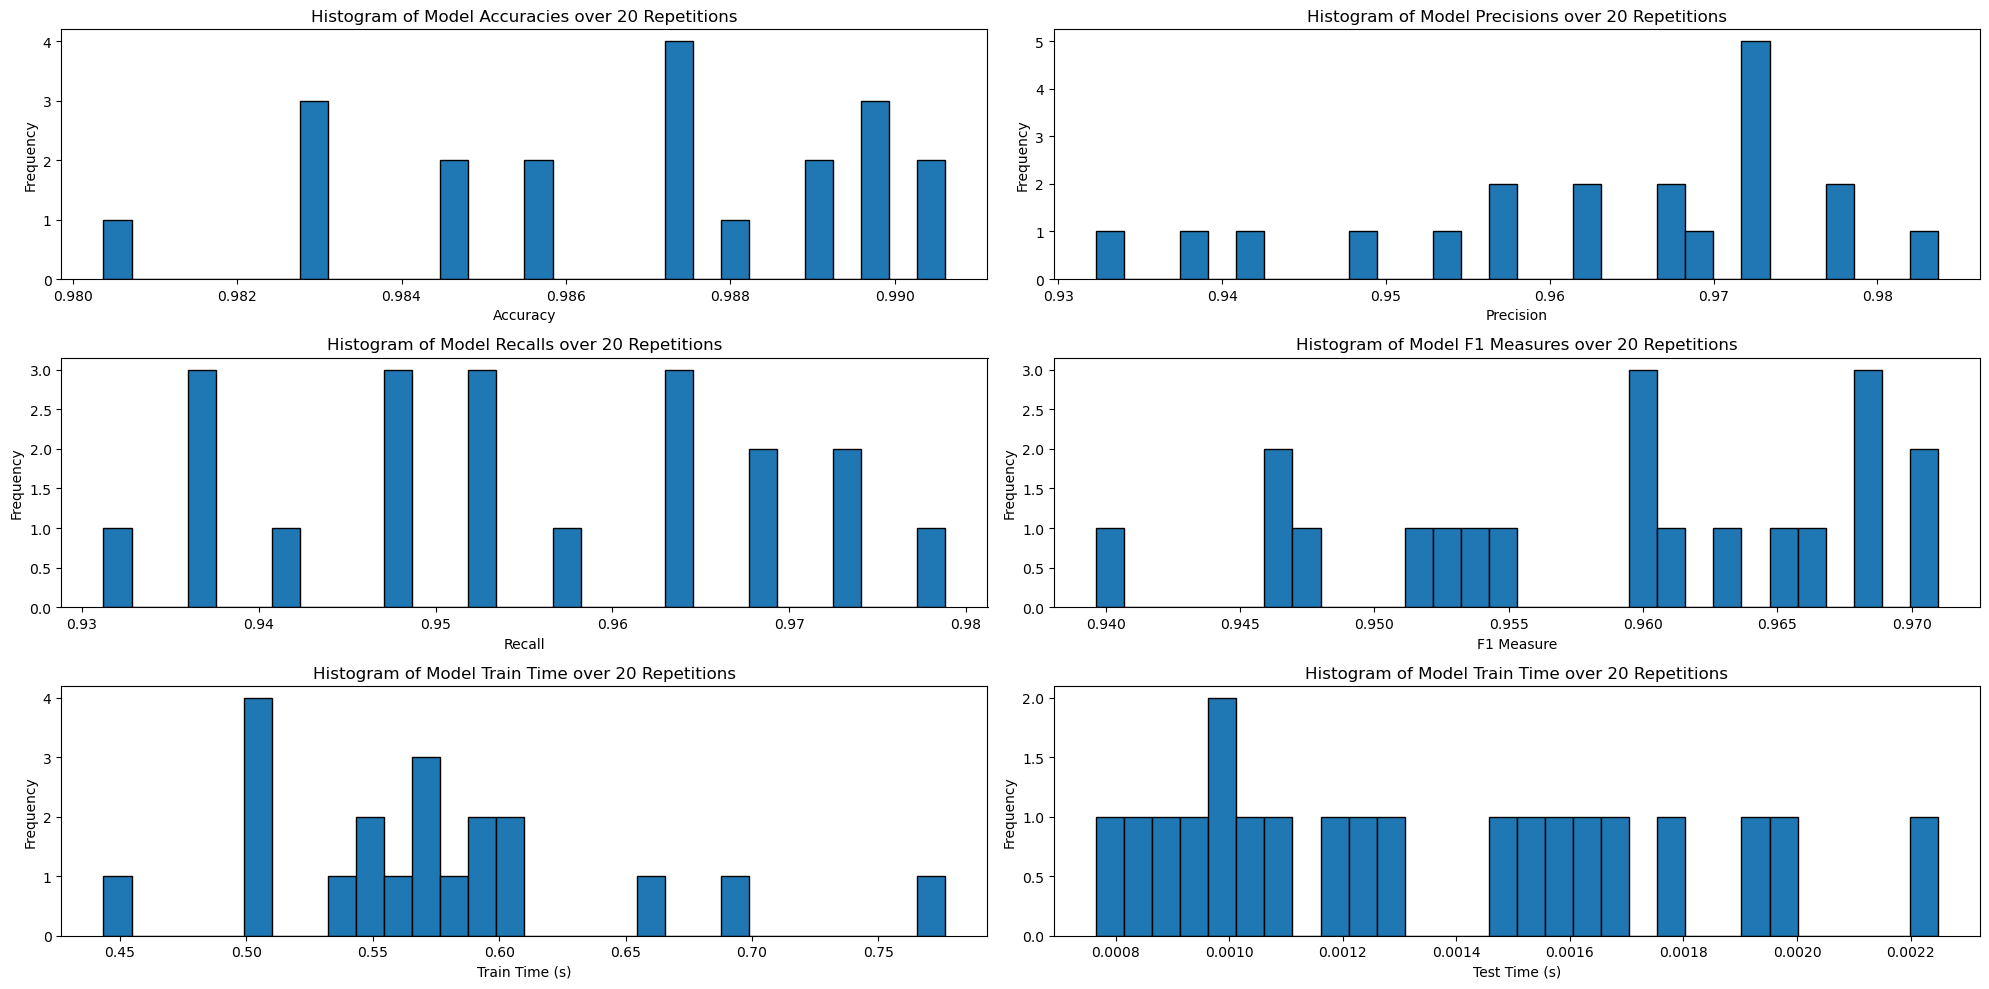

In [42]:
metrics = getRepeatedTrainTestResults(mlp_classifier, features, labels, 20)

plotPerformanceMetrics(mlp_classifier, metrics, 20)

#### Learning Curve

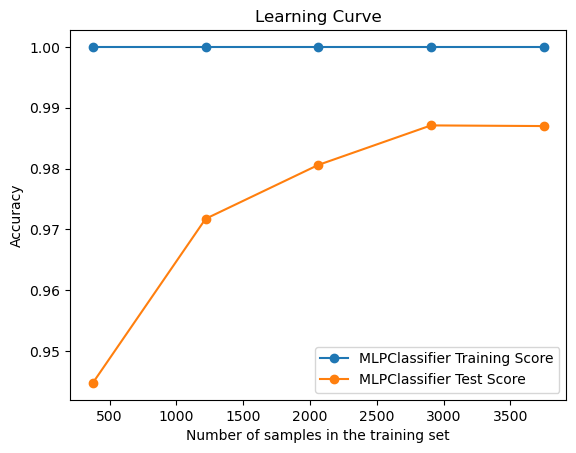

In [43]:
learningCurve([mlp_classifier], features, labels, 10)

#### ROC

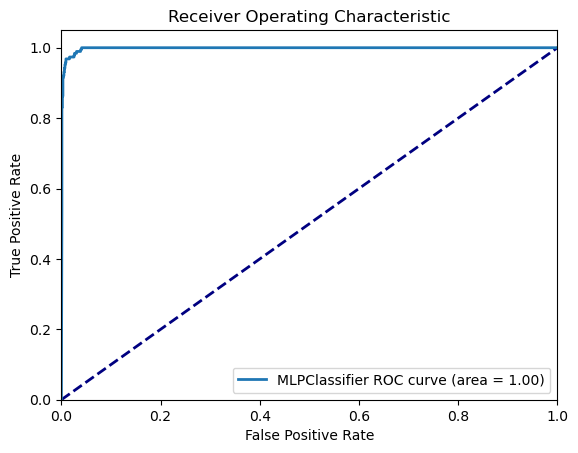

In [44]:
ROC_curve([mlp_classifier], params)

### Support Vector Machine

#### Best Score and Parameters

In [45]:
svm_classifier = SVC()

parameter_grid = {'max_iter': [200, 300, 400, 500],
                  'kernel': ['linear','rbf','sigmoid'],
                  'class_weight': ['balanced', None]}

svm_classifier = bestEstimator(svm_classifier, parameter_grid, features, labels)

Best score: 0.9650335767933758
Best parameters: {'class_weight': 'balanced', 'kernel': 'rbf', 'max_iter': 500}


#### Cross-Validation Accuracies

In [46]:
scores = getCVScore(svm_classifier, features, labels)
printScores(svm_classifier, scores)

Cross-validation Accuracies for SVC:
94.03%, 92.32%, 92.32%, 92.11%, 93.39%, 94.03%, 93.39%, 95.30%, 97.65%, 95.09%
Average Accuracy: 93.96%


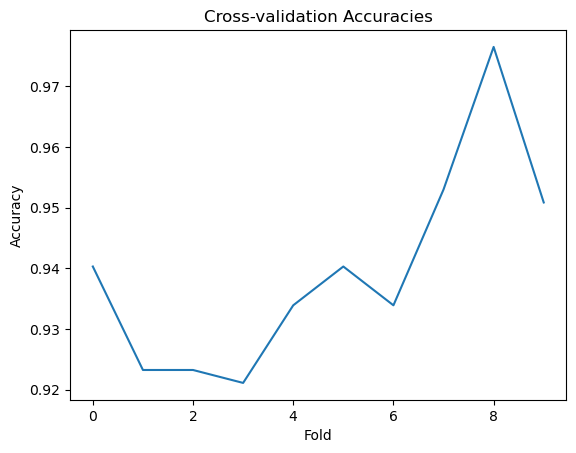

In [47]:
plotGraph(scores, 'Cross-validation Accuracies', 'Fold', 'Accuracy')

#### Performance Metrics

In [32]:
svm_classifier = SVC(max_iter=500, probability=True,kernel='rbf', class_weight='balanced', random_state=42)

metrics = getPerformanceMetrics(svm_classifier, params)

printPerformanceMetrics(svm_classifier, metrics)

Performance Metrics for the SVC:
Confusion Matrix:
[938  45]
[ 17 172]
Accuracy: 94.71%
Precision: 79.26%
Recall: 91.01%
F1 Measure: 84.73%
Time elapsed in training: 1.296539306640625s
Time elapsed in training: 0.0709543228149414s


#### Performance Metrics Over X Repetitions

Performance Metrics for the SVC:


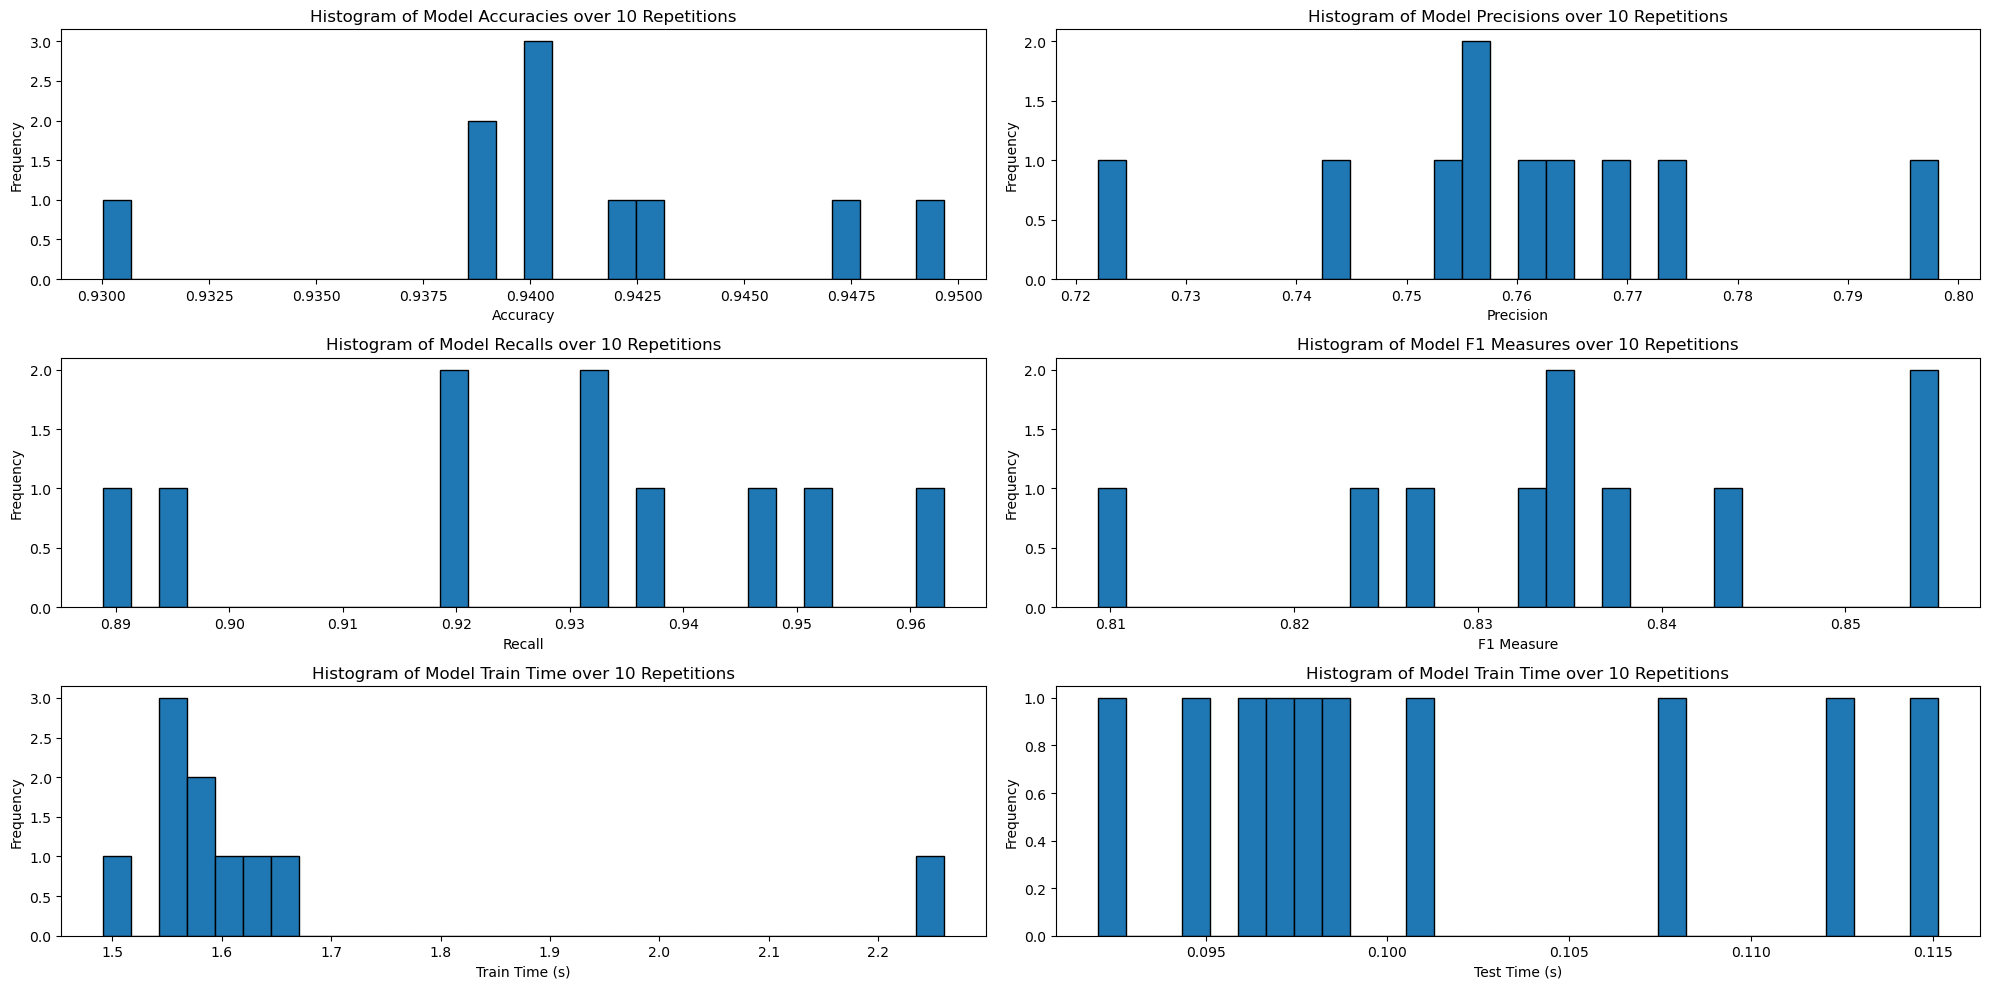

In [49]:
metrics = getRepeatedTrainTestResults(svm_classifier, features, labels, 10)

plotPerformanceMetrics(svm_classifier, metrics, 10)

#### Learning Curve

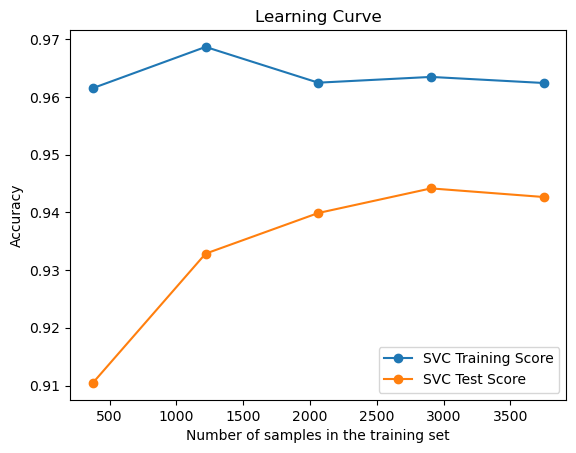

In [33]:
learningCurve([svm_classifier], features, labels, 5)

#### ROC

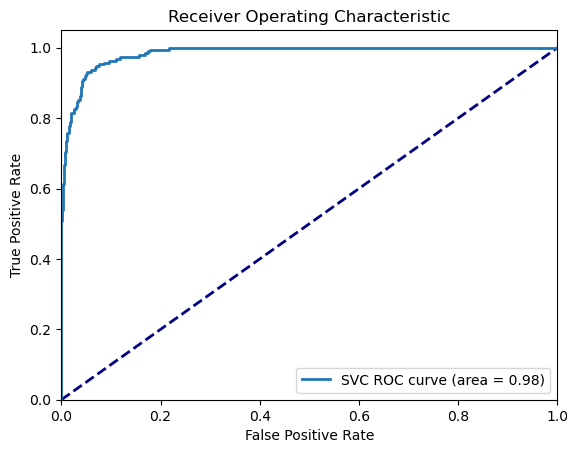

In [51]:
ROC_curve([svm_classifier], params)

### K-Nearest Neighbors

#### Best Score and Parameters

In [52]:
knn_classifier = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [3,4,5,6,7,8],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_classifier = bestEstimator(knn_classifier, parameter_grid, features, labels)

Best score: 0.9418946881739203
Best parameters: {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


#### Cross-Validation Accuracies

In [53]:
scores = getCVScore(knn_classifier, features, labels)
printScores(knn_classifier, scores)

Cross-validation Accuracies for KNeighborsClassifier:
87.63%, 85.71%, 86.35%, 87.63%, 87.63%, 89.13%, 90.19%, 90.17%, 92.74%, 92.09%
Average Accuracy: 88.93%


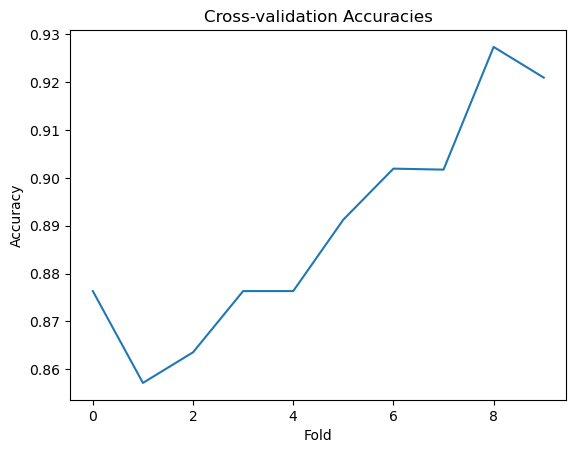

In [54]:
plotGraph(scores, 'Cross-validation Accuracies', 'Fold', 'Accuracy')

#### Performance Metrics

In [55]:
knn_classifier = KNeighborsClassifier(n_neighbors=4, algorithm='auto', weights='distance')

metrics = getPerformanceMetrics(knn_classifier, params)

printPerformanceMetrics(knn_classifier, metrics)

Performance Metrics for the KNeighborsClassifier:
Confusion Matrix:
[886  97]
[ 21 168]
Accuracy: 89.93%
Precision: 63.4%
Recall: 88.89%
F1 Measure: 74.01%
Time elapsed in training: 0.009567975997924805s
Time elapsed in training: 0.023466110229492188s


#### Performance Metrics Over X Repetitions

Performance Metrics for the KNeighborsClassifier:


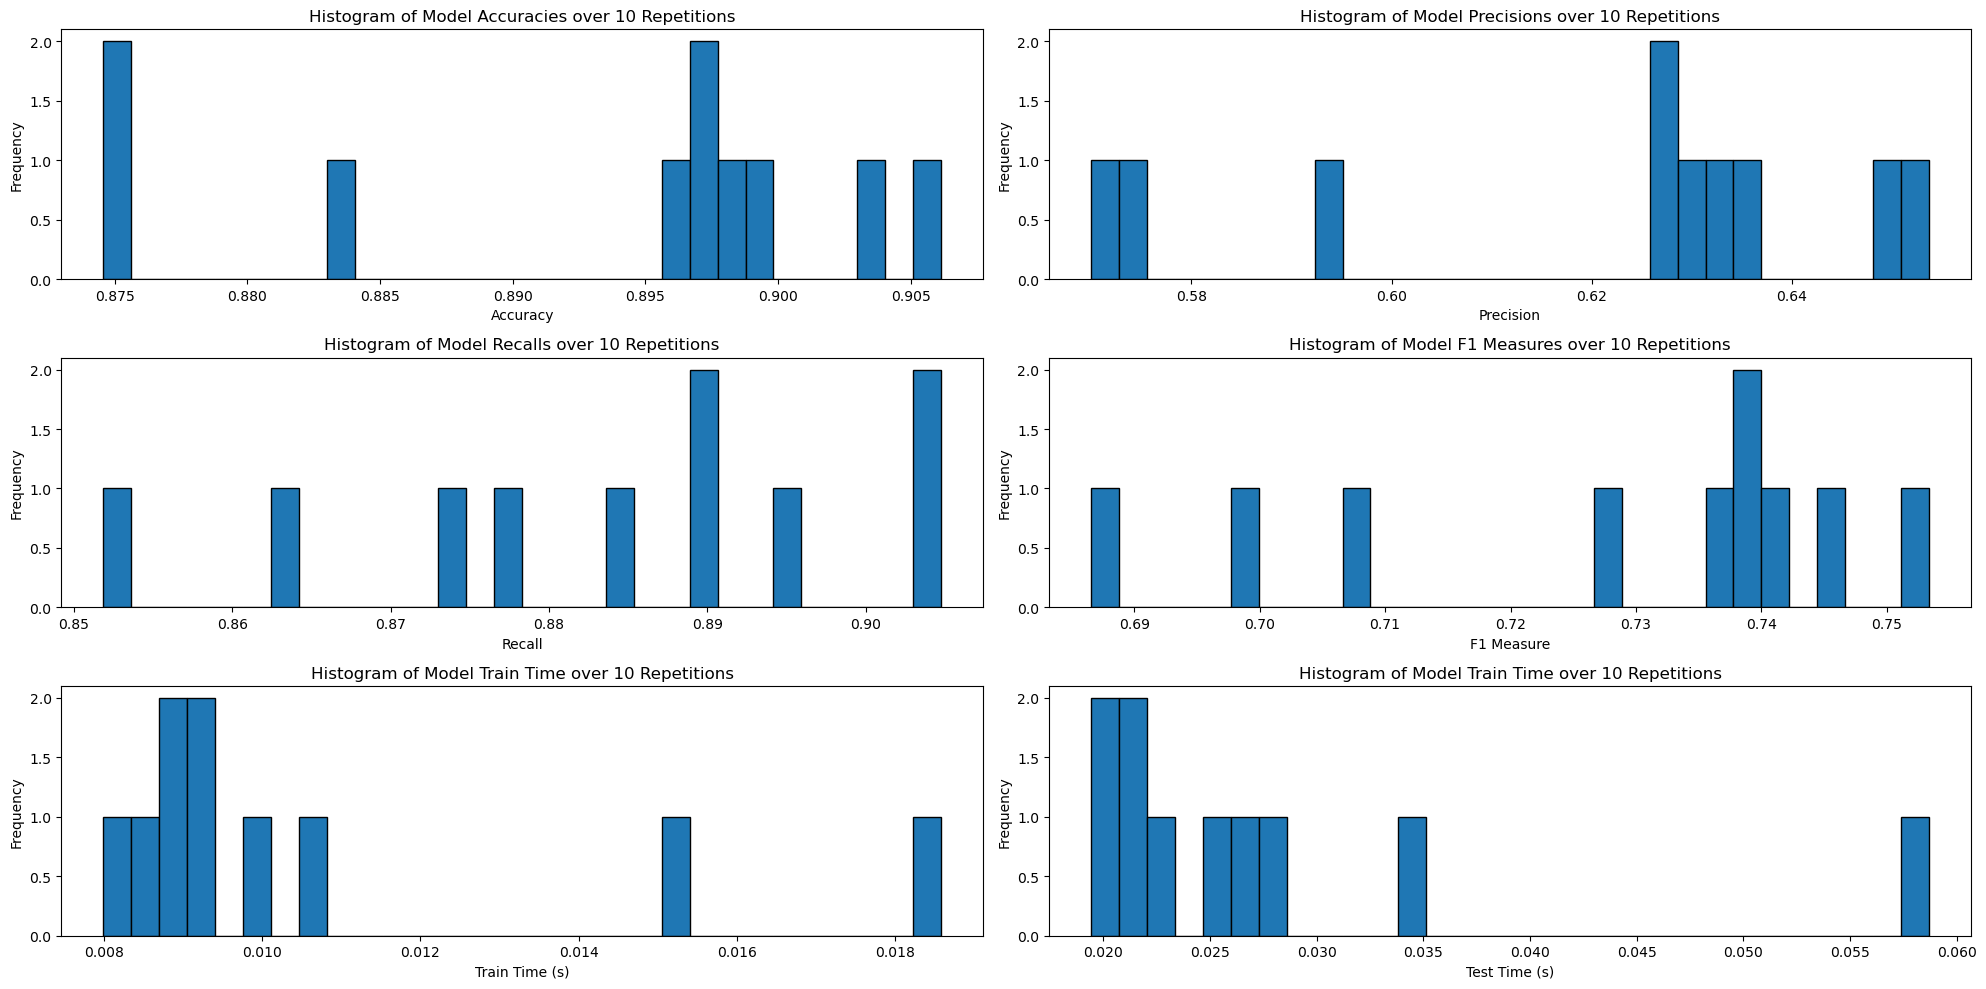

In [56]:
metrics = getRepeatedTrainTestResults(knn_classifier, features, labels, 10)

plotPerformanceMetrics(knn_classifier, metrics, 10)

#### Learning Curve

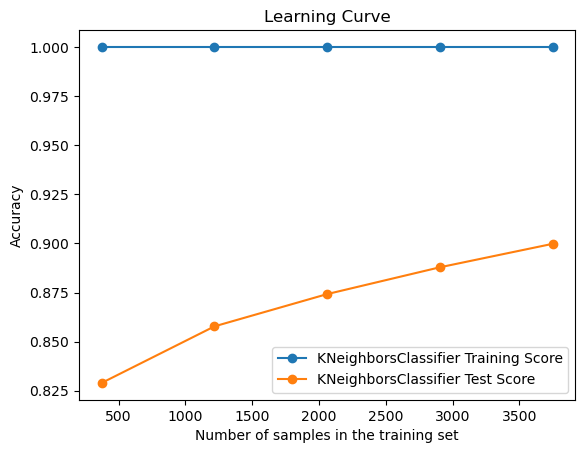

In [57]:
learningCurve([knn_classifier], features, labels, 5)

#### ROC

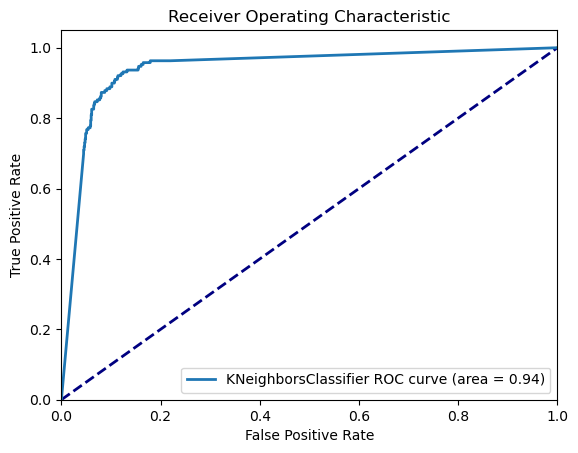

In [58]:
ROC_curve([knn_classifier], params)

### Model Comparisons

In [37]:
num_tests:int = 15

classifiers = [DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=16, splitter='best', random_state=42),
               MLPClassifier(solver='lbfgs', max_iter=300, learning_rate='constant',random_state=42),
               SVC(random_state=42, max_iter=500, probability=True,kernel='rbf', class_weight=None),
               KNeighborsClassifier(n_neighbors=4, algorithm='auto', weights='uniform')]

#### Cross-Validation Accuracies

In [60]:
scores = [getCVScore(classifier, features, labels) for classifier in classifiers]

for (classifier, score) in zip(classifiers, scores):
  printScores(classifier, score)
  print('\n')


Cross-validation Accuracies for DecisionTreeClassifier:
99.79%, 100.00%, 99.36%, 98.93%, 99.79%, 99.79%, 98.93%, 99.57%, 100.00%, 100.00%
Average Accuracy: 99.62%


Cross-validation Accuracies for MLPClassifier:
98.08%, 98.72%, 97.44%, 97.65%, 98.93%, 98.93%, 99.36%, 99.36%, 99.57%, 99.15%
Average Accuracy: 98.72%


Cross-validation Accuracies for SVC:
94.03%, 92.32%, 92.32%, 92.11%, 93.39%, 94.03%, 93.39%, 95.30%, 97.65%, 95.09%
Average Accuracy: 93.96%


Cross-validation Accuracies for KNeighborsClassifier:
88.06%, 86.14%, 86.14%, 88.49%, 88.06%, 88.49%, 89.98%, 89.96%, 92.74%, 91.88%
Average Accuracy: 88.99%




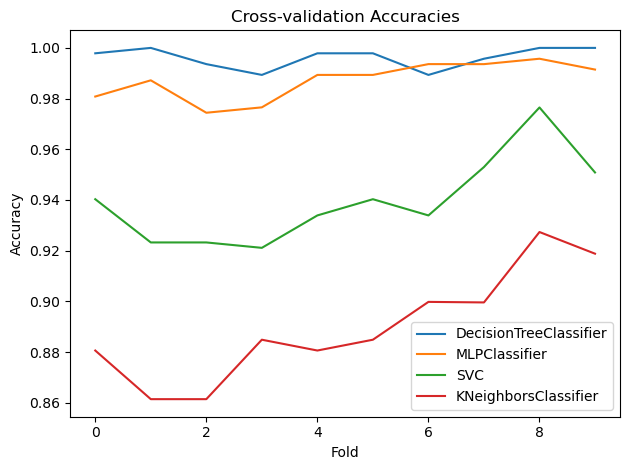

In [61]:
for score, classifier in zip(scores, classifiers):
  plotGraph(score, 'Cross-validation Accuracies', 'Fold', 'Accuracy', LINEAR, 111, classifier.__class__.__name__)


_,axes = plt.gca().get_legend_handles_labels()
plt.legend(axes,prop={'size': 10})
plt.tight_layout()
plt.show()

Here we can visualize better the differences in accuracy in the 3 models. The Decision Tree as seen before demonstrates a tremendous gap in relation to the other classifiers. Again the diminishing returns of the MLP and SVM classifiers might be related in some way with the overfitting problem.

#### Performance Metrics

In [62]:
for classifier in classifiers:
    metrics = getPerformanceMetrics(classifier, params)

    printPerformanceMetrics(classifier, metrics)
    print('\n')


Performance Metrics for the DecisionTreeClassifier:
Confusion Matrix:
[981   2]
[  3 186]
Accuracy: 99.57%
Precision: 98.94%
Recall: 98.41%
F1 Measure: 98.67%
Time elapsed in training: 0.06354594230651855s
Time elapsed in training: 0.0007679462432861328s


Performance Metrics for the MLPClassifier:
Confusion Matrix:
[976   7]
[ 11 178]
Accuracy: 98.46%
Precision: 96.22%
Recall: 94.18%
F1 Measure: 95.19%
Time elapsed in training: 0.6430940628051758s
Time elapsed in training: 0.0019388198852539062s


Performance Metrics for the SVC:
Confusion Matrix:
[938  45]
[ 17 172]
Accuracy: 94.71%
Precision: 79.26%
Recall: 91.01%
F1 Measure: 84.73%
Time elapsed in training: 1.8663251399993896s
Time elapsed in training: 0.1479780673980713s


Performance Metrics for the KNeighborsClassifier:
Confusion Matrix:
[885  98]
[ 23 166]
Accuracy: 89.68%
Precision: 62.88%
Recall: 87.83%
F1 Measure: 73.29%
Time elapsed in training: 0.01568889617919922s
Time elapsed in training: 0.01988387107849121s




As we can see, the performance metrics are very high when using a Decision Tree Classifier in comparison to MLP and/or SVM Classifiers. This may be sign of an overfitting problem, since Decision Trees are naturally less prone to overfitting than the other 2 algorithms and this might be sign that the dataset might be too complex.

#### Performance Metrics Over X Repetitions

In [35]:
#  Get the Performance Metrics from repetead trains and tests for one or more model classifiers
def getRepeatedTrainTestResultsPerMetric(classifiers, features, labels, repetitions=3):
  accuracies:list[list[float]] = []
  precisions:list[list[float]] = []
  recalls:list[list[float]] = []
  f1_measures:list[list[float]] = []
  train_times:list[list[float]] = []
  test_times:list[list[float]] = []

  for classifier in classifiers:
    accuracies.append([])
    precisions.append([])
    recalls.append([])
    f1_measures.append([])
    train_times.append([])
    test_times.append([])


  for _ in range(repetitions):
    params = train_test_split(features, labels, test_size=0.25, stratify=labels)

    for i in range(0, len(classifiers)):
      classifier= classifiers[i]

      _, accuracy, precision, recall, f1_measure, train_time, test_time = getPerformanceMetrics(classifier, params)

      accuracies[i].append(accuracy)
      precisions[i].append(precision)
      recalls[i].append(recall)
      f1_measures[i].append(f1_measure)
      train_times[i].append(train_time)
      test_times[i].append(test_time)

  return _, accuracies, precisions, recalls, f1_measures, train_times, test_times

# Plot the graph to compare the classifiers
def plotComparisonGraph(classifiers, metricName:str, metric):
  plotGraph(metric, 'Histogram of Model ' + metricName + ' over ' + str(num_tests) + ' Repetitions', metricName, 'Frequency', HISTORY, 111, [classifier.__class__.__name__ for classifier in classifiers], 1000.0)

  _,axes = plt.gca().get_legend_handles_labels()
  plt.legend(axes,prop={'size': 10})

  plt.tight_layout()
  plt.show()

metrics = getRepeatedTrainTestResultsPerMetric(classifiers, features, labels, num_tests)


##### Accuracy

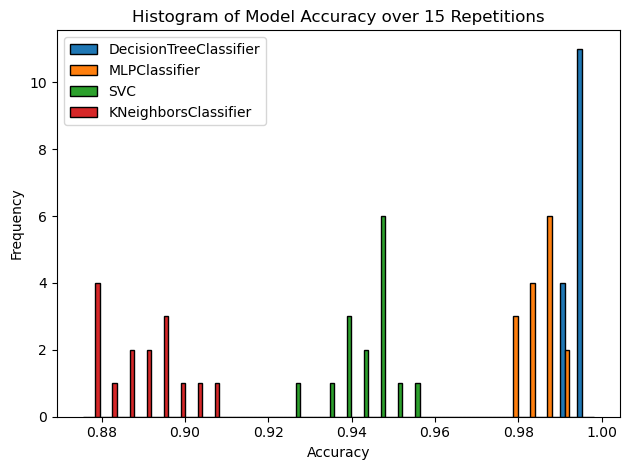

In [64]:
plotComparisonGraph(classifiers, 'Accuracy', metrics[ACCURACY])

##### Precision

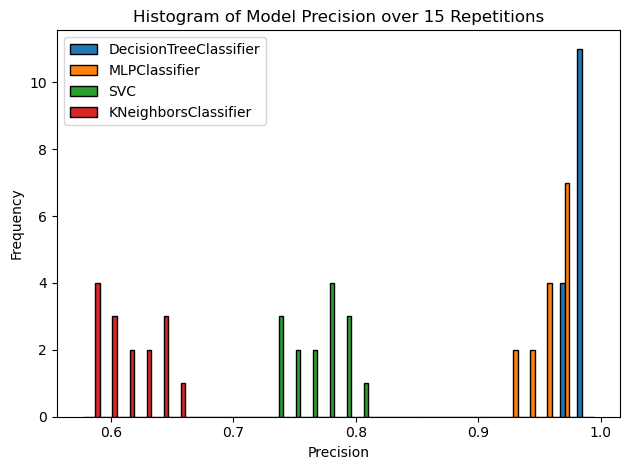

In [65]:
plotComparisonGraph(classifiers, 'Precision', metrics[PRECISION])

##### Recall

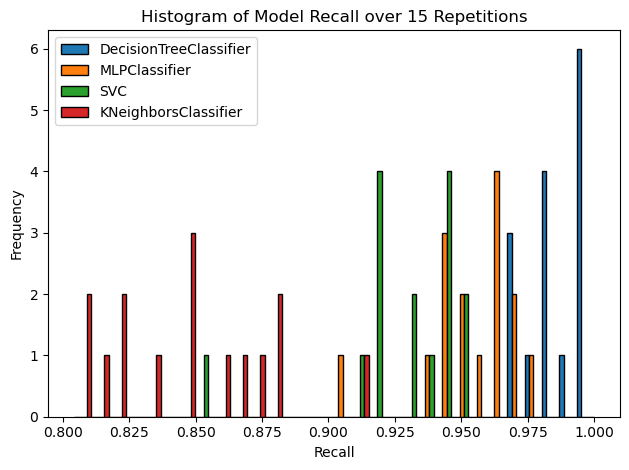

In [66]:
plotComparisonGraph(classifiers, 'Recall', metrics[RECALL])

##### F1 Measure

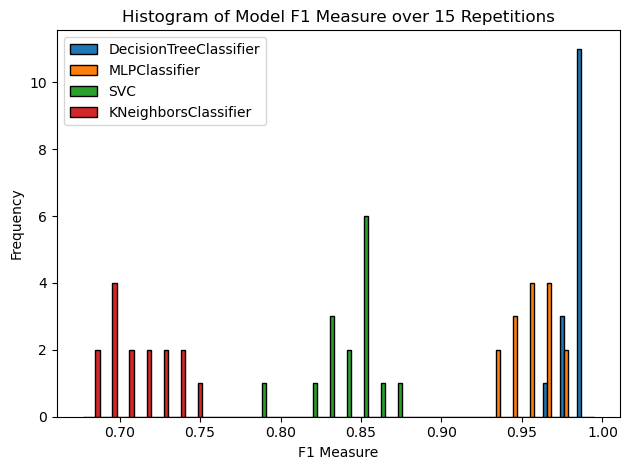

In [67]:
plotComparisonGraph(classifiers, 'F1 Measure', metrics[F1_MEASURE])

##### Traing Time

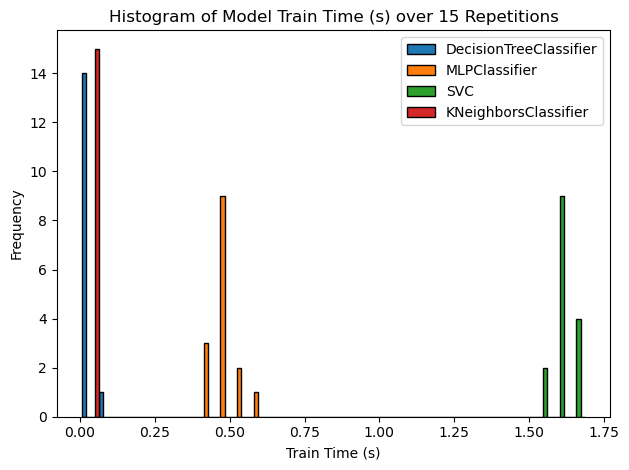

In [68]:
plotComparisonGraph(classifiers, 'Train Time (s)', metrics[TRAIN_TIME])

The Decision Tree classifier is very fast during training, due to the fact that the algorithm only has to construct a tree based on the size of the features of the dataset. On contrast, the MLP and SVM classifiers demonstrate more complexity, therefore this will lead to higher training times.

##### Test Time

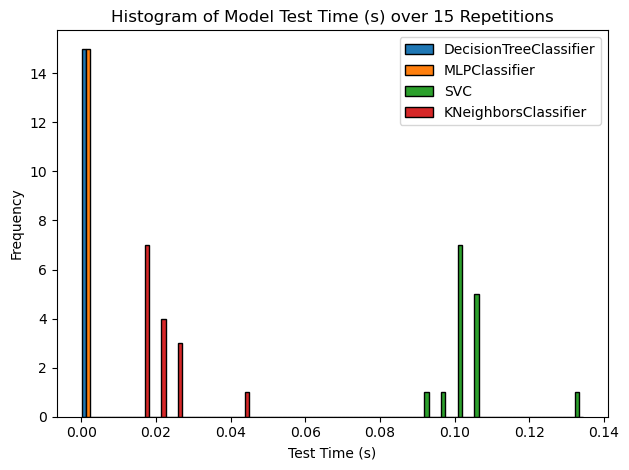

In [69]:
plotComparisonGraph(classifiers, 'Test Time (s)', metrics[TEST_TIME])

In regard to testing times, we can now see more similarity between the Decision Tree Classifier and the SVM classifier, because to predict the classifiers we only need to iterate through the nodes of the algorithms and compare them with the final result to verify their performance. On the latter classifier, the time it takes to test is longer, which can be caused by many factors, particularly sopme hyperparameters which can be set in the classifier's construction.

#### Learning Curve

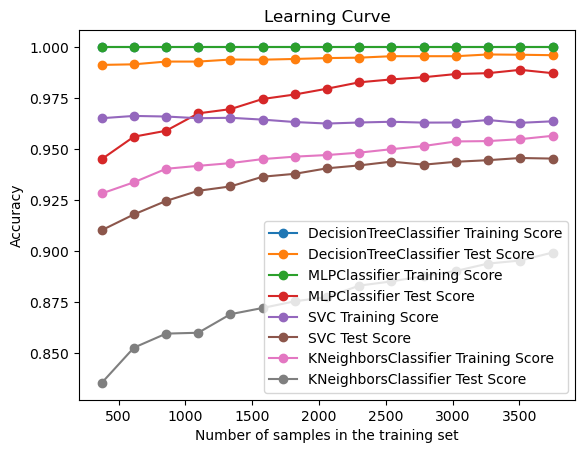

In [38]:
learningCurve(classifiers, features, labels, num_tests, num_tests)

The learning curves display the increase of accuracy per sample size. The accuracy seems to raise at lower rates but ultimately stagnates at a final stage.

#### ROC

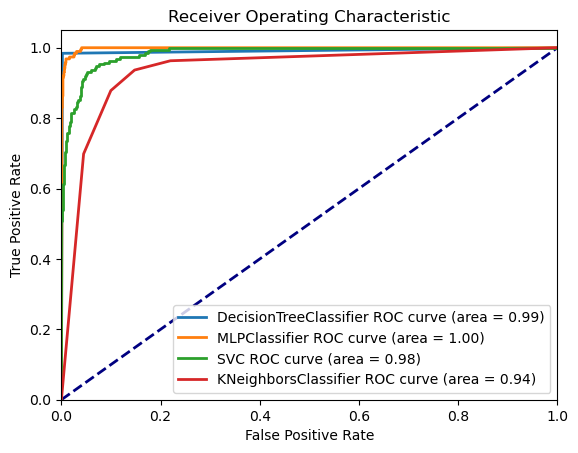

In [71]:
ROC_curve(classifiers, params)

The ROC curve demonstrates the True Positive Rates as the False Positive Rates increase. With this type of graph we can analyse which alogorithms are best in each false positive rate increment. In this case it seems that the Decision Tree Classifier is always the best option, although when comparing MLP classifier with SVM classifier, we can see that the MLP is usually better in most cases, although at extreme high False Positive Rates the SVM classifier tends to be slightly better.

## Conclusion


In the first part of the assignment, we conducted an in-depth study of the topic to understand the dataset. We then preprocessed the data by searching for missing values, unique values, and duplicated entries. Additionally, we performed an analysis of attribute correlations and used histograms and violin plots to explore relationships and gain deeper insights into the attributes.

In the second part of the assignment, we split the dataset and applied an over-sampling technique to balance it. We determined the best hyperparameters for the model classifiers, scaled the dataset, and trained various models. After testing the models, we evaluated their performance using relevant metrics. We compared the results of different models to identify the one that best fits our goals. Given the importance of reducing false negative predictions in our context, since misclassifying a hazardous asteroid as non-hazardous could have severe consequences, we prioritized models with high recall and F1-measure, in addition to accuracy.

Thus, for this case, we selected the Decision Tree model. This model demonstrated a strong ability to correctly predict hazardous asteroids, thereby reducing the likelihood of a catastrophic event. 